<a href="https://colab.research.google.com/github/GeorgeM2000/QS-World-University-Ranking/blob/main/QS_2023_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Tools

In [1]:
# Install scikit-fda to use the FuzzyCMeans algorithm
!pip install scikit-fda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.1/416.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 79.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 6.8 MB/s eta 0:00:00
  Created wheel for fdasrsf: filename=fdasrsf-2.4.3-cp310-cp310-linux_x86_64.whl size=2117121 sha256=e82fa65e3a964f12723186cb4c97666a2b23860a5de6c8c20e376b13490ea983
  Stored in directory: /root/.cache/pip/wheels/d5/ab/a1/f9c1d7c5182773a848997fb86666bb56a7d33b18ada95c36e9
Successfully built fdasrsf


In [2]:
# Import the required libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import rand_score
from sklearn.cluster import AgglomerativeClustering
#from yellowbrick.cluster import KElbowVisualizer # Used only for the Elbow method visualization
from sklearn.metrics import silhouette_score
from sklearn.manifold import MDS
#import plotly.graph_objs as go # Used for interactive plots
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import scipy.stats as ss
import matplotlib as mpl
import seaborn as sb
import numpy as np
import random
import colorsys
import math
import skfda
import sys

In [ ]:
# Install the below version of matplotlib to place labels above each bar in a bar plot
!pip install matplotlib==3.6.2

# Data Analysis and Exploration.

The QS World University Rankings 2023 feature over 1,400 universities from around the world, our biggest university ranking yet.

Institutions are assessed across six categories (or indicators) to effectively capture university performance – including academic and employer reputation, faculty/student ratio and research citations – to help you make the best decision for your future.


<h1><b>What do the indicators mean?</b></h1>

The six indicators that determine the QS World University Ranking 2023 are:

**Academic reputation** – Accounting for 40 per cent of the overall score, academic reputation looks at the teaching and research quality at the world’s universities. We collate over 130,000 expert opinions from the higher education space, creating the largest survey of academic opinion in the world.

**Employer reputation** – We know that students want to graduate with the skills and knowledge required for the employment market. We assess how institutions prepare students for successful careers, and which institutions provide the most competent, innovative, and effective graduates.

**Faculty/student ratio** – This indicator recognises that a high number of academics per student reduces the teaching burden and creates a more supportive student experience. We assess how institutions provide students with meaningful access to lecturers and tutors.

**Citations per faculty** – We measure university research quality with a citation per faculty metric, taking the total number of academic citations in papers produced by a university in a five-year period.

**International student ratio & International faculty ratio** – A highly international university creates a number of benefits. It demonstrates the ability to attract quality students and staff from across the world, and it implies a highly global outlook. Strong international institutions provide a multinational environment, building international sympathies and global awareness.

**International Research Network (IRN) Index** – IRN Index reflects the ability of institutions to diversify the geography of their international research network by establishing sustainable research partnerships with other higher education institutions. It also reflects the efficiency of this as we look at the diversity of partner locations against the efforts needed to achieve such a diversity.

**Employment Outcomes** – QS appreciates that for many students, a successful career is a primary goal of their university education. We have designed the Employment Outcomes indicator to reflect the ability of institutions to ensure a high level of employability for their graduates, while also nurturing future leaders who go on to make an impact in their respective fields.


<h1><b>Indicator Weights</b></h1>


- Academic Reputation	40%
- Employer Reputation	10%
- Faculty Student Ratio	20%
- Citations per Faculty	20%
- International Faculty Ratio	5%
- International Student Ratio	5%
- International Research Network	0% (for 2023 edition)
- Employment Outcomes	0% (for 2023 edition)


<h1><b>QS Institution Classifications</b></h1>
QS classify institutions across four dimensions for the purposes of rankings comparison. They are listed below.

**Size**

Based on the (full time equivalent) size of the degree-seeking student body. Where an FTE number is not provided or available, one will be estimated based on common characteristics of other institutions in the country or region in question.

- XL	Extra Large	More than 30,000
- L	Large	>=12,000
- M	Medium	>=5,000
- S	Small	Fewer than 5,000


**Subject Range**

Four categories based on the institution’s provision of programs in the five broad faculty areas used in the university rankings. Due to radically different publication habits and patterns in medicine, an additional category is added based on whether the subject institution has a medical school.


- FC	Full comprehensive	All 5 faculty areas + medical school
- CO	Comprehensive	All 5 faculty areas
- FO	Focused	3 or 4 faculty areas
- SP	Specialist
- 2 or fewer faculty areas

**Age**

- 5	Historic	100 years old and more
- 4	Mature	50-99 years old
- 3	Established	25-49 years old
- 2	Young	10-24 years old
- 1	New	Less than 10 years old


**Research Intensity**

Four levels of research activity evaluated based on the number of documents retrievable from Scopus in the five-year period preceding the application of the classification. The thresholds required to reach the different levels are different depending on the institution's pre-classification on aspects 1 and 2.

- VH	Very High
- HI	High
- MD	Medium
- LO	Low

In [3]:
# Load the dataset
QS_2023_Dataset = pd.read_excel("2023 QS World University Rankings V2.1 (For qs.com).xlsx")

In [ ]:
QS_2023_Dataset.head()

,2023 QS World University Rankings,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,2023,2022,Institution Name,Location,NaN,Classification,NaN,NaN,NaN,NaN,...,NaN,International Faculty,NaN,International Students,NaN,International Research Network,NaN,Employment Outcomes,NaN,Overall
1,RANK,RANK,NaN,NaN,Location,SIZE,FOCUS,RES.,AGE,STATUS,...,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,SCORE
2,rank display,rank display2,institution,location code,location,size,focus,research,age band,status,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
3,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,5,B,...,5,100,54,90,109,96.1,58,100,3,100
4,2,3=,University of Cambridge,UK,United Kingdom,L,FC,VH,5,A,...,55,100,60,96.3,70,99.5,6,100,9,98.8


In [ ]:
QS_2023_Dataset.shape

(1425, 27)

In [ ]:
QS_2023_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   2023 QS World University Rankings  1425 non-null   object
 1   Unnamed: 1                         1301 non-null   object
 2   Unnamed: 2                         1424 non-null   object
 3   Unnamed: 3                         1424 non-null   object
 4   Unnamed: 4                         1424 non-null   object
 5   Unnamed: 5                         1425 non-null   object
 6   Unnamed: 6                         1423 non-null   object
 7   Unnamed: 7                         1419 non-null   object
 8   Unnamed: 8                         1413 non-null   object
 9   Unnamed: 9                         1420 non-null   object
 10  Unnamed: 10                        1425 non-null   object
 11  Unnamed: 11                        1424 non-null   object
 12  Unname

In [4]:
QS_2023_DataFrame = pd.DataFrame(QS_2023_Dataset.iloc[3:, :])
QS_2023_DataFrame.head()

,2023 QS World University Rankings,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
3,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,5,B,...,5,100,54,90,109,96.1,58,100,3,100
4,2,3=,University of Cambridge,UK,United Kingdom,L,FC,VH,5,A,...,55,100,60,96.3,70,99.5,6,100,9,98.8
5,3,3=,Stanford University,US,United States,L,FC,VH,5,B,...,9,99.8,74,60.3,235,96.3,55,100,2,98.5
6,4,2,University of Oxford,UK,United Kingdom,L,FC,VH,5,A,...,64,98.8,101,98.4,54,99.9,3,100,7,98.4
7,5,5,Harvard University,US,United States,L,FC,VH,5,B,...,2,76.9,228,66.9,212,100,1,100,1,97.6


As we can see from the first five rows of the dataset, the columns and indexes are in an incorrect order. For example, the index of the first row is the number 3 which is incorrect, the first column is the title of the dataset and the other columns are named "Unnamed". We will rename the indexes and columns.

In [5]:
# Rename the indexes ====================================

print(f'Original length of DataFrame indexes: {len(QS_2023_DataFrame.index)}\n'
        f'Last original row index: {QS_2023_DataFrame.index[-1]}\n'
        f'First original row index: {QS_2023_DataFrame.index[0]}')

new_DataFrame_indexes = range(1,len(QS_2023_DataFrame.index)+1)
new_DataFrame_index_dict = {}
for i in range(len(QS_2023_DataFrame.index)):
  new_DataFrame_index_dict[QS_2023_DataFrame.index[i]] = new_DataFrame_indexes[i]

print(f'\nNew length of DataFrame indexes: {len(new_DataFrame_index_dict)}\n'
      f'Last new row index: {new_DataFrame_index_dict[QS_2023_DataFrame.index[-1]]}\n'
      f'First new row index: {new_DataFrame_index_dict[QS_2023_DataFrame.index[0]]}\n')

QS_2023_DataFrame = QS_2023_DataFrame.rename(new_DataFrame_index_dict, axis='index')

# Rename the columns ====================================

new_DataFrame_columns = QS_2023_Dataset.iloc[2].iloc[:]
new_DataFrame_columns_dict = {}

for i in range(len(QS_2023_Dataset.columns)):
  new_DataFrame_columns_dict[QS_2023_Dataset.columns[i]] = new_DataFrame_columns[i]


QS_2023_DataFrame = QS_2023_DataFrame.rename(new_DataFrame_columns_dict, axis='columns')

QS_2023_DataFrame

Original length of DataFrame indexes: 1422
Last original row index: 1424
First original row index: 3

New length of DataFrame indexes: 1422
Last new row index: 1422
First new row index: 1



,rank display,rank display2,institution,location code,location,size,focus,research,age band,status,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
1,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,5,B,...,5,100,54,90,109,96.1,58,100,3,100
2,2,3=,University of Cambridge,UK,United Kingdom,L,FC,VH,5,A,...,55,100,60,96.3,70,99.5,6,100,9,98.8
3,3,3=,Stanford University,US,United States,L,FC,VH,5,B,...,9,99.8,74,60.3,235,96.3,55,100,2,98.5
4,4,2,University of Oxford,UK,United Kingdom,L,FC,VH,5,A,...,64,98.8,101,98.4,54,99.9,3,100,7,98.4
5,5,5,Harvard University,US,United States,L,FC,VH,5,B,...,2,76.9,228,66.9,212,100,1,100,1,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,1401+,1201+,Universidad Nacional Autónoma de Honduras (UNAH),HN,Honduras,XL,FC,LO,5,A,...,601+,1.7,601+,NaN,NaN,8.1,601+,NaN,NaN,-
1419,1401+,1201+,Universidad Tecnológica de Bolívar,CO,Colombia,M,FO,HI,4,B,...,601+,9.3,601+,1.3,601+,8.8,601+,30.9,403,-
1420,1401+,1201+,Université Mohammed V de Rabat,MA,Morocco,XL,CO,VH,3,A,...,601+,5.2,601+,2.8,601+,51.1,601+,NaN,NaN,-
1421,1401+,NaN,University of Craiova,RO,Romania,L,CO,HI,4,A,...,601+,NaN,NaN,NaN,NaN,7.5,601+,8.7,601+,-


In [ ]:
QS_2023_DataFrame.shape

(1422, 27)

In [ ]:
QS_2023_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 1 to 1422
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank display   1422 non-null   object
 1   rank display2  1298 non-null   object
 2   institution    1422 non-null   object
 3   location code  1422 non-null   object
 4   location       1422 non-null   object
 5   size           1422 non-null   object
 6   focus          1421 non-null   object
 7   research       1417 non-null   object
 8   age band       1411 non-null   object
 9   status         1418 non-null   object
 10  ar score       1422 non-null   object
 11  ar rank        1422 non-null   object
 12  er score       1421 non-null   object
 13  er rank        1422 non-null   object
 14  fsr score      1420 non-null   object
 15  fsr rank       1422 non-null   object
 16  cpf score      1417 non-null   object
 17  cpf rank       1422 non-null   object
 18  ifr score      1324 non-null

In [ ]:
# Find out how many null values exist in the dataframe
pd.DataFrame(QS_2023_DataFrame.isnull().sum(), columns=["No. of Missing values"])

,No. of Missing values
rank display,0
rank display2,124
institution,0
location code,0
location,0
size,0
focus,1
research,5
age band,11
status,4


In [ ]:
# Find out the percent of missing values in each column
missing_percent = round(QS_2023_DataFrame.isna().mean() * 100, 1)
pd.DataFrame(missing_percent[missing_percent >= 0], columns=["% of Missing Values"])

,% of Missing Values
rank display,0.0
rank display2,8.7
institution,0.0
location code,0.0
location,0.0
size,0.0
focus,0.1
research,0.4
age band,0.8
status,0.3


In [ ]:
# Find the institutions with missing values
universities_with_missing_values = {}

# Store the name of the institutions with missing values for each indicator
for QS_2023_DataFrame_Column in list(missing_percent[missing_percent > 0].index[:]):
  universities_with_missing_values[QS_2023_DataFrame_Column] = list(QS_2023_DataFrame[QS_2023_DataFrame[QS_2023_DataFrame_Column].isna()]['institution'])

for key, value in universities_with_missing_values.items():
  print(f'===== {key} =====\n')
  for university in value:
    print(university)

  print()


===== rank display2 =====

Indian Institute of Technology Indore (IIT Indore)
Colegio de México
University of Alaska Fairbanks
Swarthmore College
Beijing University of Chemical Technology
Poznan University of Life Sciences
China University of Petroleum
University of Madras
Almaty Technological University
Sungshin Women's University
St. Louis University
Wesleyan University
Ahlia University
Alfaisal University
Indian Institute of Technology (BHU) Varanasi
University of Alabama, Birmingham
Khoja Akhmet Yassawi International Kazakh-Turkish University
University of South Bohemia
Chandigarh University
China University of Mining and Technology
Donghua University
Duy Tan University
Instituto Tecnológico de Santo Domingo (INTEC)
Kyrgyz-Turkish Manas University
Nanjing Agricultural University
National Institute of Technology Tiruchirappalli
Northern Borders University
Northwest Agriculture and Forestry University
Ritsumeikan Asia Pacific University
Russian-Armenian (Slavonic) State University
Sh

In [6]:
# Copy the DataFrame to a new DataFrame so we can store it as a CSV file
QS_2023_DataFrame_CSV = QS_2023_DataFrame.copy()

In [7]:
# Store the DataFrame as a CSV and print some information about it
QS_2023_DataFrame_CSV.to_csv("QS_2023_Dataset.csv",index=False)
QS_2023_DataFrame_CSV = pd.read_csv("QS_2023_Dataset.csv")
QS_2023_DataFrame_CSV.describe()

,age band,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
count,1411.000000,1422.000000,1421.000000,1420.000000,1417.000000,1324.000000,1365.000000,1409.000000,1410.000000
mean,4.008505,20.124684,20.657143,29.997113,24.529358,31.659517,26.545348,49.570121,26.186809
std,0.965320,22.802706,24.027928,28.172207,27.910952,34.170817,30.896854,30.205439,26.201036
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,5.400000,4.400000,8.200000,3.100000,4.800000,3.300000,21.600000,6.700000
50%,4.000000,10.800000,10.300000,18.250000,11.100000,13.750000,10.800000,47.700000,15.500000
75%,5.000000,23.775000,27.000000,43.500000,39.400000,55.075000,40.500000,77.600000,36.900000
max,5.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


We can see that the data type of some of the indicators has changed

In [ ]:
QS_2023_DataFrame_CSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank display   1422 non-null   object 
 1   rank display2  1298 non-null   object 
 2   institution    1422 non-null   object 
 3   location code  1422 non-null   object 
 4   location       1422 non-null   object 
 5   size           1422 non-null   object 
 6   focus          1421 non-null   object 
 7   research       1417 non-null   object 
 8   age band       1411 non-null   float64
 9   status         1418 non-null   object 
 10  ar score       1422 non-null   float64
 11  ar rank        1422 non-null   object 
 12  er score       1421 non-null   float64
 13  er rank        1422 non-null   object 
 14  fsr score      1420 non-null   float64
 15  fsr rank       1422 non-null   object 
 16  cpf score      1417 non-null   float64
 17  cpf rank       1422 non-null   object 
 18  ifr scor

Now we want to plot a correlation heatmap to analyze the relation of each indicator with all other indicators.

In [ ]:
DF_size_values = {'S': 25., 'M': 50., 'L': 75., 'XL': 100.}
DF_focus_values = {'SP': 25., 'FO': 50., 'CO': 75., 'FC': 100.}

In [ ]:
DF_size_values = {'S': 1., 'M': 2., 'L': 3., 'XL': 4.}
DF_focus_values = {'SP': 1., 'FO': 2., 'CO': 3., 'FC': 4.}

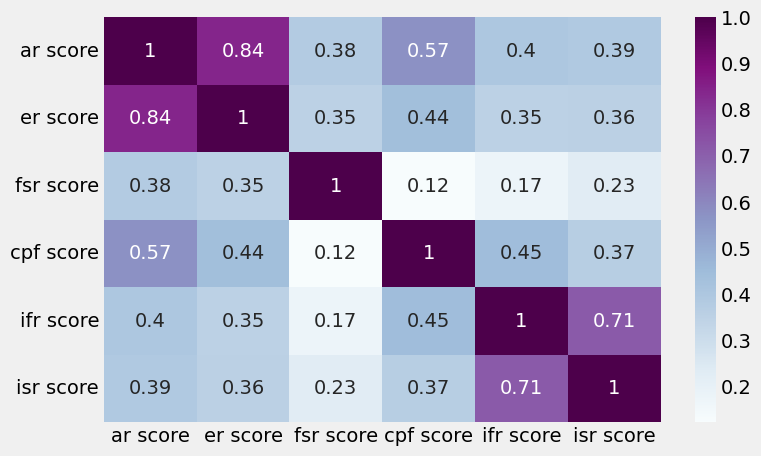

In [ ]:
"""

Create a temporary dataframe to convert the 'size' and the 'focus' indicators to numerical values.
Also, remove the institutions that have missing values on at least one of the 9 indicators you see below.

"""
temp_DF = QS_2023_DataFrame_CSV.loc[QS_2023_DataFrame_CSV['size'].notnull() &
                                    QS_2023_DataFrame_CSV['focus'].notnull() &
                                    QS_2023_DataFrame_CSV['age band'].notnull() &
                                    QS_2023_DataFrame_CSV['ar score'].notnull() &
                                    QS_2023_DataFrame_CSV['er score'].notnull() &
                                    QS_2023_DataFrame_CSV['fsr score'].notnull() &
                                    QS_2023_DataFrame_CSV['isr score'].notnull() &
                                    QS_2023_DataFrame_CSV['cpf score'].notnull() &
                                    QS_2023_DataFrame_CSV['ifr score'].notnull()].copy()

temp_DF = temp_DF.reset_index(drop=True)
temp_DF['focus'] = [DF_focus_values[temp_DF['focus'][row]] for row in range(temp_DF.shape[0])]
temp_DF['size'] = [DF_size_values[temp_DF['size'][row]] for row in range(temp_DF.shape[0])]

# Convert 'focus' type from object to float64
temp_DF['focus'] = temp_DF['focus'].astype('float64')

# Convert 'size' type from object to float64
temp_DF['size'] = temp_DF['size'].astype('float64')

# Plot correlation heatmap for indicators score columns
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,5))
dataplot = sb.heatmap(temp_DF[['ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score']].corr(), cmap="BuPu", annot=True)
plt.show()

In [ ]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [ ]:
confusion_matrix_array = [
    pd.crosstab(temp_DF['size'], temp_DF['focus']),
    pd.crosstab(temp_DF['size'], temp_DF['age band']),
    pd.crosstab(temp_DF['focus'], temp_DF['age band'])
    ]

print(f'Size-Focus: {cramers_v(confusion_matrix_array[0].values)}')
print(f'Size-Age band: {cramers_v(confusion_matrix_array[1].values)}')
print(f'Focus-Age band: {cramers_v(confusion_matrix_array[2].values)}')


Size-Focus: 0.2746693651723429
Size-Age band: 0.17754953385933736
Focus-Age band: 0.14691289250515885


In [ ]:
categorical_continuous_correlation = [
    ss.pointbiserialr(temp_DF['size'], temp_DF['ar score']),
    ss.pointbiserialr(temp_DF['size'], temp_DF['er score']),
    ss.pointbiserialr(temp_DF['size'], temp_DF['fsr score']),
    ss.pointbiserialr(temp_DF['size'], temp_DF['cpf score']),
    ss.pointbiserialr(temp_DF['size'], temp_DF['ifr score']),
    ss.pointbiserialr(temp_DF['size'], temp_DF['isr score']),

    ss.pointbiserialr(temp_DF['focus'], temp_DF['ar score']),
    ss.pointbiserialr(temp_DF['focus'], temp_DF['er score']),
    ss.pointbiserialr(temp_DF['focus'], temp_DF['fsr score']),
    ss.pointbiserialr(temp_DF['focus'], temp_DF['cpf score']),
    ss.pointbiserialr(temp_DF['focus'], temp_DF['ifr score']),
    ss.pointbiserialr(temp_DF['focus'], temp_DF['isr score']),

    ss.pointbiserialr(temp_DF['age band'], temp_DF['ar score']),
    ss.pointbiserialr(temp_DF['age band'], temp_DF['er score']),
    ss.pointbiserialr(temp_DF['age band'], temp_DF['fsr score']),
    ss.pointbiserialr(temp_DF['age band'], temp_DF['cpf score']),
    ss.pointbiserialr(temp_DF['age band'], temp_DF['ifr score']),
    ss.pointbiserialr(temp_DF['age band'], temp_DF['isr score']),
]

for corr in categorical_continuous_correlation:
  print(corr)

SignificanceResult(statistic=0.3166968342746246, pvalue=7.363866610853599e-32)
SignificanceResult(statistic=0.19364932157306236, pvalue=1.6195469481696954e-12)
SignificanceResult(statistic=-0.19553939473163798, pvalue=9.738900665292222e-13)
SignificanceResult(statistic=0.09736474231842313, pvalue=0.00042135328565548886)
SignificanceResult(statistic=-0.07921214283141248, pvalue=0.0041493991020444335)
SignificanceResult(statistic=-0.098020167321698, pvalue=0.00038495638376758124)
SignificanceResult(statistic=0.3666281099453687, pvalue=6.924872433509074e-43)
SignificanceResult(statistic=0.2341570598254755, pvalue=9.483229473539115e-18)
SignificanceResult(statistic=0.09331940255564888, pvalue=0.0007270629654108816)
SignificanceResult(statistic=0.20780904907434275, pvalue=3.161827318555174e-14)
SignificanceResult(statistic=0.10965661121911176, pvalue=7.065482136265682e-05)
SignificanceResult(statistic=0.040441626654149965, pvalue=0.14378973234949138)
SignificanceResult(statistic=0.299151393

# Show the sizes of the institutions.

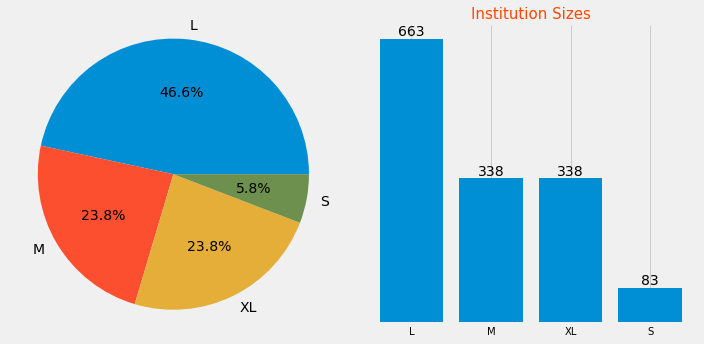

In [ ]:
# What are the sizes of the institutions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.pie(QS_2023_DataFrame[:]['size'].value_counts().values, labels = QS_2023_DataFrame[:]['size'].value_counts().index, autopct='%1.1f%%')
ax1.axis('equal')


ax2.bar(QS_2023_DataFrame[:]['size'].value_counts().index, QS_2023_DataFrame[:]['size'].value_counts().values)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.tick_params(axis='both', which='both', labelsize=10, left=False, bottom=False)
ax2.get_yaxis().set_visible(False)
plt.title("Institution Sizes", fontsize=15, color = '#ff4800');

ax2.bar_label(ax2.containers[0])
fig.tight_layout()


# Show the research degree(Very High, High, Medium, Low) of the institutions.

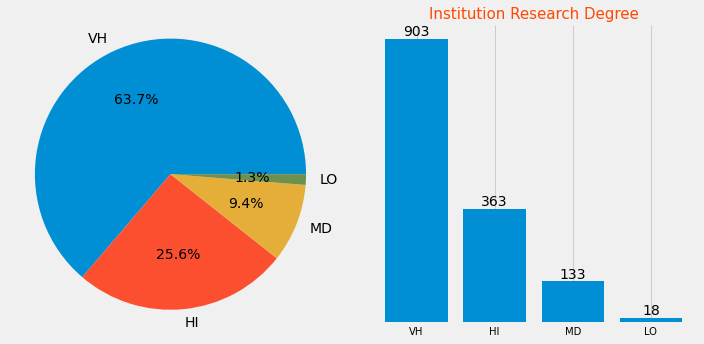

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.pie(QS_2023_DataFrame[:]['research'].value_counts().values, labels = QS_2023_DataFrame[:]['research'].value_counts().index, autopct='%1.1f%%')
ax1.axis('equal')


ax2.bar(QS_2023_DataFrame[:]['research'].value_counts().index, QS_2023_DataFrame[:]['research'].value_counts().values)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.tick_params(axis='both', which='both', labelsize=10, left=False, bottom=False)
ax2.get_yaxis().set_visible(False)
plt.title("Institution Research Degree", fontsize=15, color = '#ff4800');

ax2.bar_label(ax2.containers[0])
fig.tight_layout()

In [ ]:
QS_2023_DataFrame.location.value_counts().index

# Show the Focus(Broad Faculty Areas) of institutions.

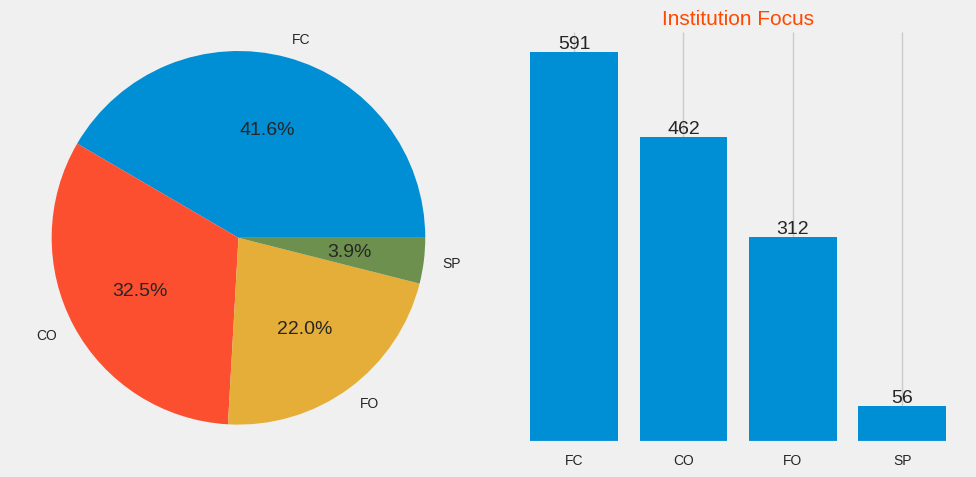

In [ ]:
# What are the broad faculty areas of the institutions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.pie(QS_2023_DataFrame[:]['focus'].value_counts().values, labels = QS_2023_DataFrame[:]['focus'].value_counts().index, autopct='%1.1f%%')
ax1.axis('equal')


ax2.bar(QS_2023_DataFrame[:]['focus'].value_counts().index, QS_2023_DataFrame[:]['focus'].value_counts().values)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.tick_params(axis='both', which='both', labelsize=10, left=False, bottom=False)
ax2.get_yaxis().set_visible(False)
plt.title("Institution Focus", fontsize=15, color = '#ff4800');

ax2.bar_label(ax2.containers[0])
fig.tight_layout()

# Show the Age Band of the Institutions.

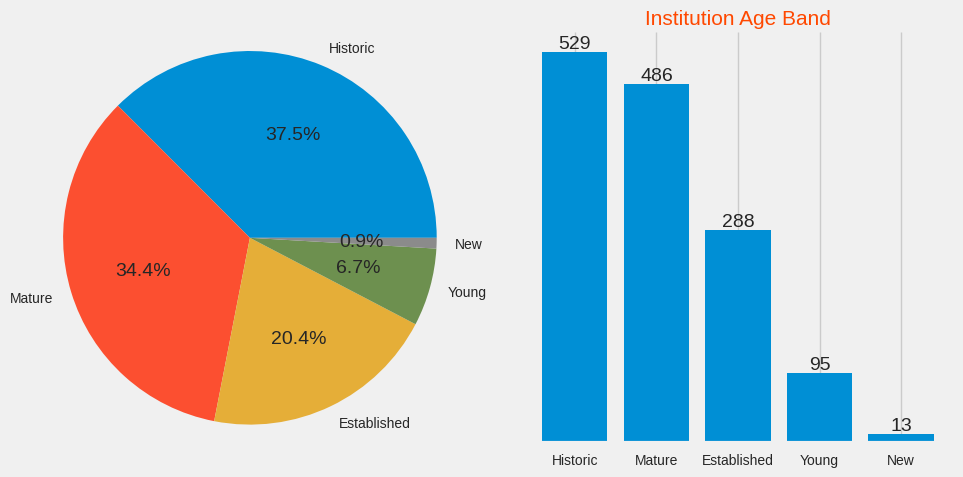

In [ ]:
# What are the age bands of the institutions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

age_band = {5: 'Historic', 4: 'Mature', 3: 'Established', 2: 'Young', 1: 'New'}

ax1.pie(QS_2023_DataFrame[:]['age band'].value_counts().values,
        labels = np.array([age_band[band] for band in QS_2023_DataFrame[:]['age band'].value_counts().index]),
        autopct = '%1.1f%%')

ax1.axis('equal')


ax2.bar(np.array([age_band[band] for band in QS_2023_DataFrame[:]['age band'].value_counts().index]), QS_2023_DataFrame[:]['age band'].value_counts().values)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.tick_params(axis='both', which='both', labelsize=10, left=False, bottom=False)
ax2.get_yaxis().set_visible(False)
plt.title("Institution Age Band", fontsize=15, color = '#ff4800');

ax2.bar_label(ax2.containers[0])
fig.tight_layout()

# Show the distribution of institutions across countries.

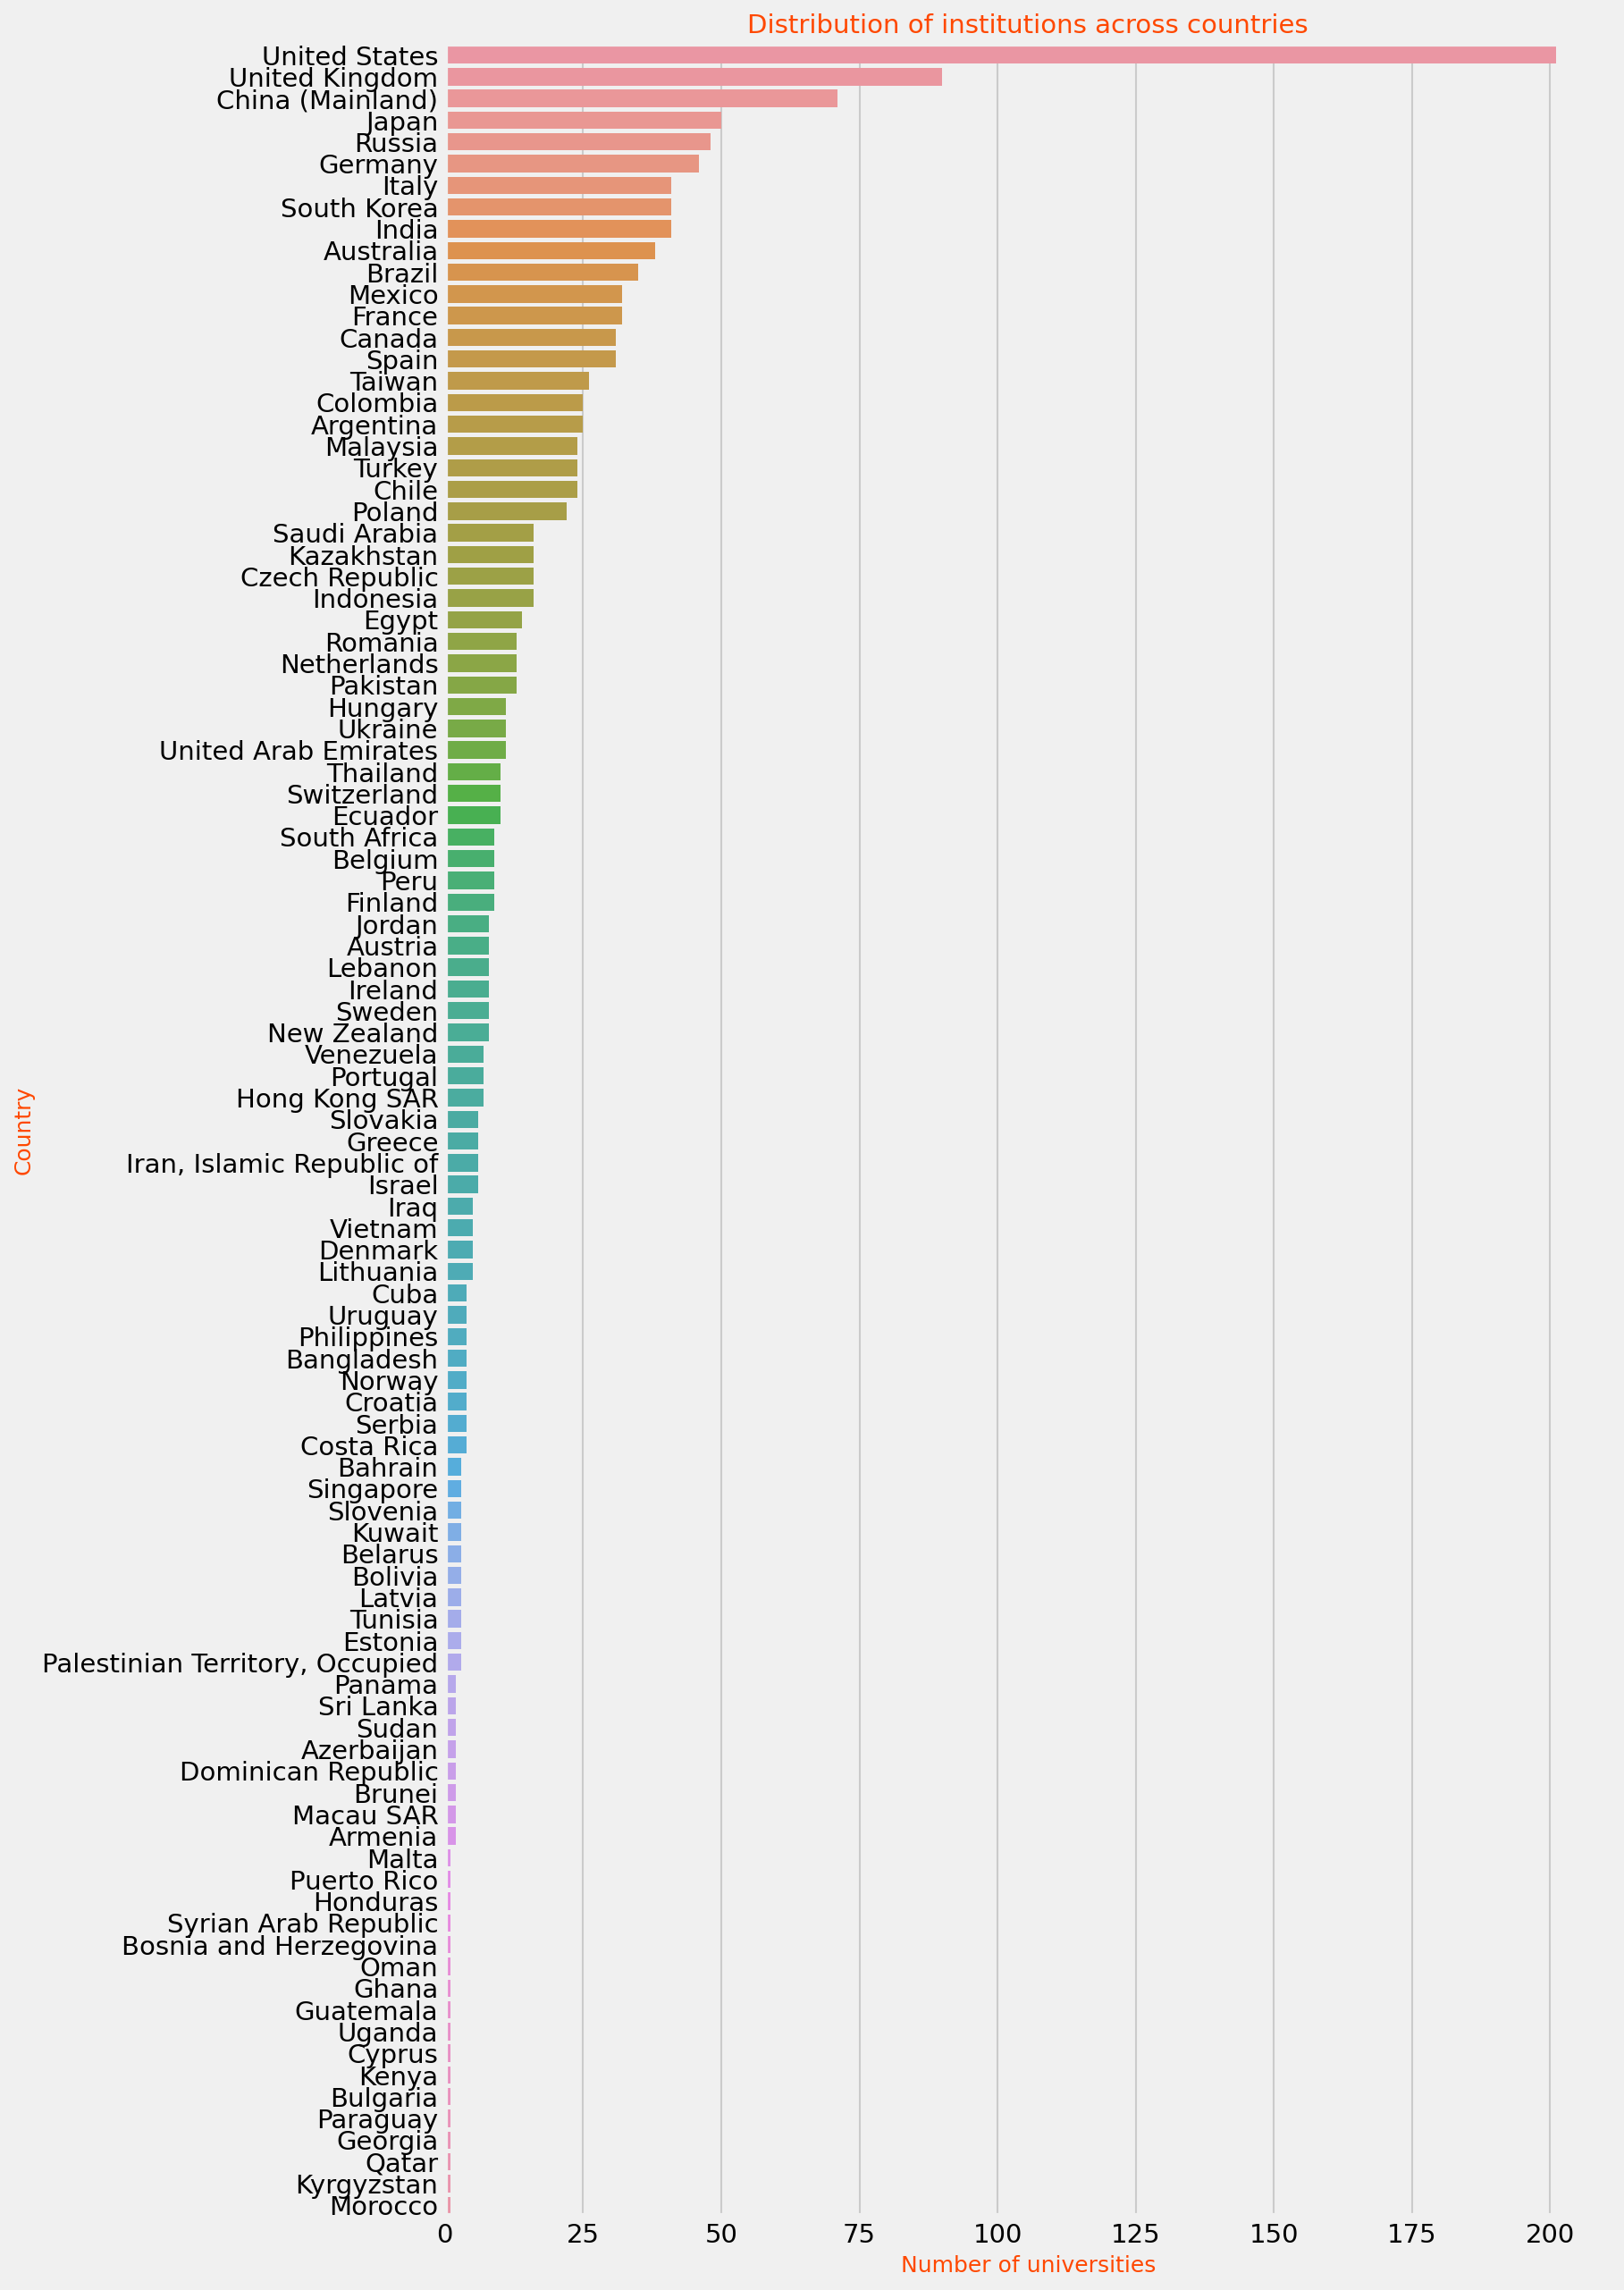

In [ ]:
fig, ax = plt.subplots(figsize=(10,20), dpi=150)

sb.countplot(data=QS_2023_DataFrame, y='location', order=QS_2023_DataFrame.location.value_counts().index)
plt.xlabel('Number of universities', fontsize=12, color = '#ff4800')
plt.ylabel('Country', fontsize=12, color = '#ff4800')
plt.title("Distribution of institutions across countries", fontsize=14, color = '#ff4800');

# What are the top 20 institutions for each of the 8 indicators




1.   Academic Reputation
2.   Employer Reputaion
3.   Faculty/Student Ratio
4.   Employer Outcome
5.   International Faculty
6.   International Students
7.   International Research Network
8.   Citations Per Facility


We will be using the rank indicator feature of the QS dataset. The data type of these features is string. Some strings can be converted to float but others have a '+' added to them e.g 501+, 601+. Those values will be converted to NaN, but that will not be a problem because we will select the top 20 institutions, for which their values can be converted to float.

In [ ]:

QS_2023_DataFrame_CSV['ar rank'] = pd.to_numeric(QS_2023_DataFrame_CSV['ar rank'], errors='coerce')
QS_2023_DataFrame_CSV['er rank'] = pd.to_numeric(QS_2023_DataFrame_CSV['er rank'], errors='coerce')
QS_2023_DataFrame_CSV['fsr rank'] = pd.to_numeric(QS_2023_DataFrame_CSV['fsr rank'], errors='coerce')
QS_2023_DataFrame_CSV['cpf rank'] = pd.to_numeric(QS_2023_DataFrame_CSV['cpf rank'], errors='coerce')
QS_2023_DataFrame_CSV['ifr rank'] = pd.to_numeric(QS_2023_DataFrame_CSV['ifr rank'], errors='coerce')
QS_2023_DataFrame_CSV['isr rank'] = pd.to_numeric(QS_2023_DataFrame_CSV['cpf rank'], errors='coerce')
QS_2023_DataFrame_CSV['irn rank'] = pd.to_numeric(QS_2023_DataFrame_CSV['cpf rank'], errors='coerce')
QS_2023_DataFrame_CSV['ger rank'] = pd.to_numeric(QS_2023_DataFrame_CSV['cpf rank'], errors='coerce')

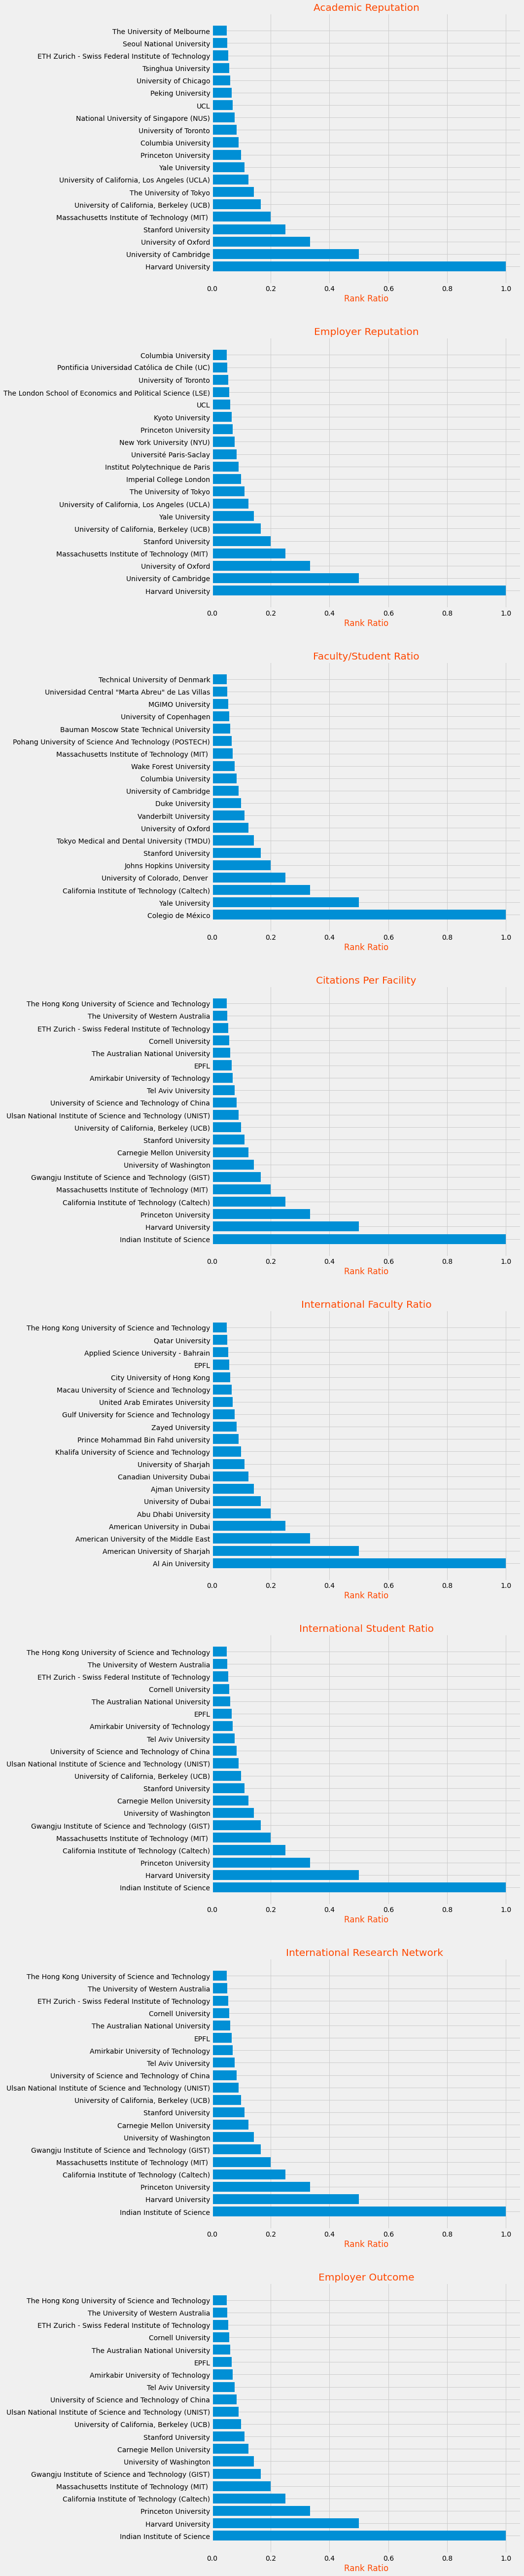

In [ ]:
def plot_rank(title, column, subplot_index):
  axes[subplot_index].barh( QS_2023_DataFrame_CSV.sort_values(by=[column])['institution'].head(20).to_numpy(),
          QS_2023_DataFrame_CSV[column].sort_values().head(20).apply(lambda rank: 1.0/rank).to_numpy())

  axes[subplot_index].set_title(title, color = '#ff4800')
  axes[subplot_index].set_xlabel("Rank Ratio", color = '#ff4800')

figure, axes = plt.subplots(8, figsize=(10, 50))
plt.subplots_adjust(top=1.5)


plot_rank("Academic Reputation", 'ar rank', 0)
plot_rank("Employer Reputation", 'er rank', 1)
plot_rank("Faculty/Student Ratio", 'fsr rank', 2)
plot_rank("Citations Per Facility", 'cpf rank', 3)
plot_rank("International Faculty Ratio", 'ifr rank', 4)
plot_rank("International Student Ratio", 'isr rank', 5)
plot_rank("International Research Network ", 'irn rank', 6)
plot_rank("Employer Outcome", 'ger rank', 7)


plt.show()

# Clustering Algorithms

## Clustering Helper Functions and Classes
We will define some functions to help us with clustering visualization and organization.

In [8]:
# Colors used for each cluster. These colors are unique and bright so that there is a distinction among them.
COLORS = [
'#FF0000','#FFFF00','#00EAFF',
'#AA00FF','#FF7F00','#BFFF00',
'#0095FF','#FF00AA','#FFD400',
'#6AFF00','#0040FF','#EDB9B9',
'#B9D7ED','#E7E9B9','#DCB9ED',
'#B9EDE0','#8F2323','#23628F',
'#8F6A23','#6B238F','#4F8F23',
'#000000','#737373','#CCCCCC',
]

In [9]:
def Non_Interactive_Cluster_2D_Viz(data, labels, ordered_clusters, cluster_centers=None):
  # For matplotlib 2D scatter plot
  plt.figure(figsize = (20,10))
  plt.style.use("default")
  cluster_index = 1

  for k in ordered_clusters.keys():
    x = data[labels == k,0]
    y = data[labels == k,1]

    plt.scatter(x, y, label = f'{cluster_index}', color=COLORS[cluster_index - 1], s=50)

    # Plot the cluster centers
    #plt.scatter(cluster_centers[i][0], cluster_centers[i][1], marker='^', color='black', s=150)

    cluster_index += 1

  # Get current axes
  ax = plt.gca()

  # Hide x-axis
  ax.get_xaxis().set_visible(False)

  # Hide y-axis
  ax.get_yaxis().set_visible(False)

  plt.legend(fontsize = 15)
  plt.grid(False)
  plt.show()

In [10]:
def Non_Interactive_Overlapping_Cluster_2D_Viz_(data, number_of_clusters):
  # For matplotlib 2D scatter plot
  plt.figure(figsize = (20,10))
  plt.style.use("default")
  points = []

  # Access legend objects automatically created from data
  handles, labels = plt.gca().get_legend_handles_labels()

  for k in range(number_of_clusters):
    points.append(Line2D([0], [0], label=f'{k+1}', marker='o', color='w', markersize=10, markerfacecolor=COLORS[k], linestyle=''))

  for inst in data:

      plt.plot(inst[4], inst[5], c=COLORS[inst[3]-1], markerfacecoloralt=COLORS[inst[2]-1],
                 marker='.', markeredgecolor='None',
                 markersize=15, fillstyle='left', markeredgewidth=0)


  # Get current axes
  ax = plt.gca()

  # Hide x-axis
  ax.get_xaxis().set_visible(False)

  # Hide y-axis
  ax.get_yaxis().set_visible(False)

  # Add manual symbols to auto legend
  handles.extend(points)

  plt.legend(handles=handles, fontsize = 15)
  plt.grid(False)
  plt.show()

In [11]:
def Interactive_Cluster_2D_Viz(data, labels, ordered_clusters, qs_df):
  Traces = []
  cluster_index = 1
  sizes = {1.: 'XL', .75: 'L', .5: 'M', .25: 'S'}
  for k in ordered_clusters.keys():
    x = data[np.where(labels == k)][:, 0]
    y = data[np.where(labels == k)][:, 1]
    Traces.append(
        {
          "mode": "markers",
          "name": f'Cluster: {cluster_index} Size: {len(x)}',
          "type": "scatter",
          "text": [qs_df['institution'][inst_index] + ' ' + sizes[qs_df['size'][inst_index]] for inst_index in list(np.where(labels == k)[0])],
          "x": x,
          "y": y,
          "marker": {
            "color": f'{COLORS[k]}'
          }
      }
    )
    cluster_index += 1
    fig = go.Figure(data=go.Data(Traces))
    fig.show(config=dict({'scrollZoom': True}))

In [12]:
def Cluster_3D_Visualization(data, labels, qs_df, ordered_clusters):

  Traces = []
  cluster_index = 1
  sizes = {1.: 'XL', .75: 'L', .5: 'M', .25: 'S'}
  for cluster_number in ordered_clusters.keys():
    x = data[np.where(labels == cluster_number)][:, 0]
    y = data[np.where(labels == cluster_number)][:, 1]
    z = data[np.where(labels == cluster_number)][:, 2]
    Traces.append(
        {
          "mode": "markers",
          "name": f'Cluster: {cluster_index} Size: {len(x)}',
          "type": "scatter3d",
          "text": [qs_df['institution'][inst_index] + ' ' + sizes[qs_df['size'][inst_index]] for inst_index in list(np.where(labels == cluster_number)[0])],
          "x": x,
          "y": y,
          "z": z,
          "marker": {
            "color": f'{COLORS[cluster_number]}'
          }
      }
    )
    cluster_index += 1
    fig = go.Figure(data = go.Data(Traces), layout = go.Layout(margin=dict(l=0,r=0), height = 800, width = 800))
    fig.show()

In [13]:
# Plot the size of each cluster sorted in ascending order
def Plot_Clusters_Size(labels, number_of_clusters):

  # Get the size of each cluster
  cluster_sizes = np.array([(labels == label).sum() for label in range(number_of_clusters)])

  # Sort them in ascending order
  ordered_cluster_sizes = np.sort(cluster_sizes)

  # Plot them
  ax = sb.countplot(x=labels, order=np.argsort(cluster_sizes))
  ax.bar_label(container=ax.containers[0], labels=ordered_cluster_sizes)

In [14]:
# Create an array of labels
def Create_2D_Labels(ordered_clusters, clusters):
  clusters_2_labels = []
  for k in ordered_clusters.keys():
    for _ in range(len(clusters[k])):
      clusters_2_labels.append(k)

  return np.array(clusters_2_labels)

In [15]:
def Create_Clusters(labels, number_of_clusters, df):

  # Create a cluster for each label and assign the institutions to each cluster
  clusters = [[] for _ in range(number_of_clusters)]

  # Create a custom dataframe to store each institution's cluster number
  dataframe_data = []

  for label_index in range(len(labels)):
    clusters[labels[label_index]].append((
                                          df.iloc[label_index]['institution'],
                                          df.iloc[label_index]['rank display'],
                                          df.iloc[label_index]['size'],
                                          df.iloc[label_index]['focus'],
                                          df.iloc[label_index]['age band'],
                                          df.iloc[label_index]['ar score'],
                                          df.iloc[label_index]['er score'],
                                          df.iloc[label_index]['fsr score'],
                                          df.iloc[label_index]['isr score'],
                                          df.iloc[label_index]['cpf score'],
                                          df.iloc[label_index]['ifr score']
                                          ))

    dataframe_data.append([df.iloc[label_index]['institution'], df.iloc[label_index]['rank display'], labels[label_index]])


  return clusters, pd.DataFrame(dataframe_data, columns=['institution', 'rank', 'cluster'])

In [16]:
def Create_2D_Clusters(labels, number_of_clusters, data):

  # Create a cluster for each label and assign the institutions to each cluster
  clusters = [[] for _ in range(number_of_clusters)]

  for label_index in range(len(labels)):
    clusters[labels[label_index]].append((data[label_index][0], data[label_index][1]))


  return clusters

In [17]:
def Create_2D_Ordered_Cluster_Array(ordered_clusters, clusters):
    cluster_array = []

    for k in ordered_clusters.keys():
      for inst in clusters[k]:
        cluster_array.append([inst[0], inst[1]])

    return np.array(cluster_array)

In [18]:
# Print some information about the institutions of each cluster
def Print_Clusters(clusters):

  for cluster_idx in range(len(clusters)):

    print("\n===============================")
    for institution in clusters[cluster_idx]:
      print(f'{institution[0]}    {institution[1]}    {institution[2]}')
    print("===============================")


In [19]:
# Order the clusters based on the mean value of each cluster. The mean value of each cluster is calculated by summing-up the mean of each institution in that cluster
def Order_Clusters(clusters):

  clusters_mean = {}
  for cluster_indx in range(len(clusters)):

    cluster_mean = 0.0
    for institution in clusters[cluster_indx]:

      institution_mean = 0.0
      for indicator_score in list(institution[2:]):
        institution_mean += indicator_score

      cluster_mean += (institution_mean / 9.)

    try:
      clusters_mean[cluster_indx] = cluster_mean / len(clusters[cluster_indx])
    except ZeroDivisionError:
      print(f'Cluster: {cluster_indx} Cluster Mean:{cluster_mean} Cluster Length:{len(clusters[cluster_indx])}')


  keys = list(clusters_mean.keys())
  values = list(clusters_mean.values())
  sorted_value_index = np.argsort(values)

  return {keys[sorted_value_index[i]]: values[sorted_value_index[i]] for i in range(len(sorted_value_index)-1, -1, -1)}



In [20]:
# Print the clusters in descending order
def Print_Ordered_Clusters(clusters, clusters_mean, df):

  for key, value in clusters_mean.items():

    print(f'\n\nCluster: {key}\nSize: {len(clusters[key])}\nMean: {value}\n===============================')
    for institution in clusters[key]:
      print(f'{institution[0]}'.ljust(100) + f'    {df.index[df["institution"] == institution[0]].tolist()[0]}') # Replace the 'df.index...' with institution[1] for the real rank of the institution.
    print("===============================")

In [21]:
def Find_Missing_Cluster_Institutions(clusters, ordered_clusters, QS_2023_DataFrame_CSV_CA, cluster_dataframe, cluster_data=None):

  df_index = 0
  dataframe_data = [] # This dataframe will contain all institutions in order
  for cluster, mean in ordered_clusters.items():

    print(f'\n\nCluster: {cluster}\nMean: {mean}\n===============================')

    cluster_size = 0
    inst_index = 0
    missing_institution_clusters = [] # Store the unique cluster numbers of all the missing institutions

    while inst_index < len(clusters[cluster]):
      current_inst_index = QS_2023_DataFrame_CSV_CA.index[QS_2023_DataFrame_CSV_CA["institution"] == clusters[cluster][inst_index][0]].tolist()[0]

      if current_inst_index < df_index:

        inst_index += 1

      # For institutions that do not belong to the expected cluster
      elif current_inst_index > df_index:

        while current_inst_index > df_index:

          # Get the cluster number the institution belongs to
          missing_institution_cluster = cluster_dataframe.iloc[cluster_dataframe.index[cluster_dataframe['institution'] == QS_2023_DataFrame_CSV_CA.iloc[df_index][1]].tolist()[0]].tolist()[1]

          print(f'{QS_2023_DataFrame_CSV_CA.iloc[df_index][1]}'.ljust(100) + f'{QS_2023_DataFrame_CSV_CA.index[QS_2023_DataFrame_CSV_CA["institution"] == QS_2023_DataFrame_CSV_CA.iloc[df_index][1]].tolist()[0]} {missing_institution_cluster}')

          dataframe_data.append([
            QS_2023_DataFrame_CSV_CA.iloc[df_index][1], # Institution
            QS_2023_DataFrame_CSV_CA.index[QS_2023_DataFrame_CSV_CA["institution"] == QS_2023_DataFrame_CSV_CA.iloc[df_index][1]].tolist()[0], # Rank(based on index)
            cluster, # Expected Cluster
            missing_institution_cluster, # Actual Cluster
            cluster_data[df_index][0],
            cluster_data[df_index][1]
          ])

          # If the missing institution cluster is not seen before, add it to the list
          if missing_institution_cluster not in missing_institution_clusters:
            missing_institution_clusters.append(missing_institution_cluster)

          cluster_size += 1
          df_index += 1

      # For institutions that belong to the expected cluster
      elif current_inst_index == df_index:

        dataframe_data.append([
          QS_2023_DataFrame_CSV_CA.iloc[df_index][1], # Institution
          QS_2023_DataFrame_CSV_CA.index[QS_2023_DataFrame_CSV_CA["institution"] == QS_2023_DataFrame_CSV_CA.iloc[df_index][1]].tolist()[0], # Rank(based on index)
          cluster, # Expected Cluster
          cluster, # Actual Cluster
          cluster_data[df_index][0],
          cluster_data[df_index][1]
        ])

        inst_index += 1
        df_index += 1

    print(f'\nSize: {cluster_size}\nMissing Institution Clusters: {missing_institution_clusters}\n===============================')

  return pd.DataFrame(dataframe_data, columns=[
      "institution",
      "rank",
      "expected cluster",
      "actual cluster",
      "x",
      "y"
  ])


In [22]:
# Apply 2D dimensionality reduction using the MDS algorithm
def Reduce_Dimensionality_2D(Cluster_Data):
  Embedding_2D = MDS(n_components=2, eps=1e-10)
  Cluster_Data_2D = Embedding_2D.fit_transform(Cluster_Data)

  return Cluster_Data_2D

# Apply 3D dimensionality reduction using the MDS algorithm
def Reduce_Dimensionality_3D(Cluster_Data):
  Embedding_3D = MDS(n_components=3, eps=1e-10)
  Cluster_Data_3D = Embedding_3D.fit_transform(Cluster_Data)

  return Cluster_Data_3D

In [23]:
def Create_QS_Labels(clusters, ordered_clusters):
  QS_labels = []
  for k in ordered_clusters.keys():
    for _ in range(len(clusters[k])):
      QS_labels.append(k)

  return np.array(QS_labels)

In [24]:
def Create_QS_Clusters(clusters, ordered_clusters, QS_dataframe, cluster_data_2d):
  QS_clusters = [[] for _ in range(len(clusters))]
  dataframe_index = 0
  dataframe_data = []

  for k in ordered_clusters.keys():
    for _ in range(len(clusters[k])):
      QS_clusters[k].append(QS_dataframe.iloc[dataframe_index]['institution'])

      dataframe_data.append([QS_dataframe.iloc[dataframe_index]['institution'],
                             QS_dataframe.iloc[dataframe_index]['rank display'],
                             k,
                             cluster_data_2d[dataframe_index][0],
                             cluster_data_2d[dataframe_index][1]])
      dataframe_index += 1

  return QS_clusters, pd.DataFrame(data=dataframe_data, columns=[
      "institution",
      "rank",
      "cluster",
      "x",
      "y"
  ])

In [25]:
from pandas.core.dtypes import missing
def Get_Missing_Institutions(clusters, QS_clusters, ordered_clusters, cluster_dataframe, QS_cluster_dataframe, cluster_data_2d):

  dataframe_data = []
  missing_institution_counts = []
  missing_institution_clusters = []
  dataframe_index = 0

  for k in ordered_clusters.keys():
    current_cluster_institutions = [inst[0] for inst in clusters[k]]
    count = 0
    missing_institution_clusters.append({})

    for inst in QS_clusters[k]:
      if inst in current_cluster_institutions:
        dataframe_data.append([inst, QS_cluster_dataframe.iloc[dataframe_index]['rank'], k, k, cluster_data_2d[dataframe_index][0], cluster_data_2d[dataframe_index][1]])
      else:
        missing_institution_cluster = cluster_dataframe.iloc[cluster_dataframe.index[cluster_dataframe['institution'] == inst].tolist()[0]].tolist()[2]
        dataframe_data.append([inst,
                               QS_cluster_dataframe.iloc[dataframe_index]['rank'],
                               k,
                               missing_institution_cluster,
                               cluster_data_2d[dataframe_index][0], cluster_data_2d[dataframe_index][1]])

        try:
          missing_institution_clusters[-1][missing_institution_cluster] += 1
        except:
          missing_institution_clusters[-1][missing_institution_cluster] = 1

        count += 1

      dataframe_index += 1

    missing_institution_counts.append(count)


  return missing_institution_counts, missing_institution_clusters, pd.DataFrame(data=dataframe_data, columns=[
      "institution",
      "rank",
      "expected cluster",
      "actual cluster",
      "x",
      "y"
  ])

## DataFrame
Create a DataFrame for clustering algorithms. Original DataFrame contains institutions with missing values on some of the 8 core indicators. We remove the institutions with missing values so that the clustering of the institutions can be unbiased.

- Academic Reputation
- Employer Reputaion
- Faculty/Student Ratio
- International student ratio & International faculty ratio
- Citations Per Facility


In [29]:
# Choose the institutions that have none of their 9 indicators score values to null
QS_2023_DataFrame_CSV_CA = QS_2023_DataFrame_CSV.loc[QS_2023_DataFrame_CSV['institution'].notnull() &
                                                     QS_2023_DataFrame_CSV['rank display'].notnull() &
                                                     QS_2023_DataFrame_CSV['size'].notnull() &
                                                     QS_2023_DataFrame_CSV['focus'].notnull() &
                                                     QS_2023_DataFrame_CSV['age band'].notnull() &
                                                     QS_2023_DataFrame_CSV['ar score'].notnull() &
                                                     QS_2023_DataFrame_CSV['er score'].notnull() &
                                                     QS_2023_DataFrame_CSV['fsr score'].notnull() &
                                                     QS_2023_DataFrame_CSV['isr score'].notnull() &
                                                     QS_2023_DataFrame_CSV['cpf score'].notnull() &
                                                     QS_2023_DataFrame_CSV['ifr score'].notnull()]

In [ ]:
# Choose the institutions that have at least one of their 6 indicators score values to null
pd.DataFrame(QS_2023_DataFrame_CSV.loc[QS_2023_DataFrame_CSV['institution'].notnull() &
                                                     QS_2023_DataFrame_CSV['rank display'].notnull() &
                                                     QS_2023_DataFrame_CSV['size'].notnull() &
                                                     QS_2023_DataFrame_CSV['ar score'].isnull() |
                                                     QS_2023_DataFrame_CSV['er score'].isnull() |
                                                     QS_2023_DataFrame_CSV['fsr score'].isnull() |
                                                     QS_2023_DataFrame_CSV['isr score'].isnull() |
                                                     QS_2023_DataFrame_CSV['cpf score'].isnull() |
                                                     QS_2023_DataFrame_CSV['ifr score'].isnull()]).head()

,rank display,rank display2,institution,location code,location,size,focus,research,age band,status,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
246,246=,252=,Yeshiva University,US,United States,S,FC,VH,5.0,B,...,21,NaN,NaN,8.9,601+,42.2,601+,24.1,505,38.8
352,352=,344=,Universität Jena,DE,Germany,L,FC,VH,5.0,A,...,601+,NaN,NaN,24.0,479,87.7,202,8.1,601+,30.9
389,390=,398,Pakistan Institute of Engineering and Applied ...,PK,Pakistan,S,FO,VH,3.0,A,...,310,NaN,NaN,NaN,NaN,23.4,601+,91.2,60,29.1
395,396=,NaN,Indian Institute of Technology Indore (IIT Ind...,IN,India,S,FO,VH,2.0,A,...,70,2.5,601+,NaN,NaN,23.8,601+,37.2,352,28.7
420,420=,447=,Universität Leipzig,DE,Germany,L,FC,VH,5.0,A,...,601+,NaN,NaN,17.1,578,85.9,228,13.5,601+,27.4


In [30]:
# Drop the unwanted columns from the dataset
QS_2023_DataFrame_CSV_CA = QS_2023_DataFrame_CSV_CA.drop(['rank display2',
                               'location code',
                               'location',
                               'research',
                               'status',
                               'ar rank',
                               'er rank',
                               'fsr rank',
                               'cpf rank',
                               'isr rank',
                               'ifr rank',
                               'irn score',
                               'irn rank',
                               'ger score',
                               'ger rank',
                               'score scaled'], axis=1)

In [31]:
# Reset the index so that it starts from 0
QS_2023_DataFrame_CSV_CA = QS_2023_DataFrame_CSV_CA.reset_index(drop=True)

The Dataframe has no missing values on the 8 core indicators.

In [ ]:
pd.DataFrame(QS_2023_DataFrame_CSV_CA.isnull().sum(), columns=["No. of Missing values"])

,No. of Missing values
rank display,0
institution,0
size,0
focus,0
age band,0
ar score,0
er score,0
fsr score,0
cpf score,0
ifr score,0


In [ ]:
QS_2023_DataFrame_CSV_CA.shape

(1308, 11)

In [ ]:
QS_2023_DataFrame_CSV_CA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank display  1308 non-null   object 
 1   institution   1308 non-null   object 
 2   size          1308 non-null   object 
 3   focus         1308 non-null   object 
 4   age band      1308 non-null   float64
 5   ar score      1308 non-null   float64
 6   er score      1308 non-null   float64
 7   fsr score     1308 non-null   float64
 8   cpf score     1308 non-null   float64
 9   ifr score     1308 non-null   float64
 10  isr score     1308 non-null   float64
dtypes: float64(7), object(4)
memory usage: 112.5+ KB


Now we will use the **MinMaxScaler()** function scales each feature individually so that the values have a given minimum and maximum value, with a default of 0 and 1.

The formula to scale feature values to between 0 and 1 is:

**X(norm) = (X - X(min))/X(max) - X(min)**

Subtract the minimum value from each entry and then divide the result by the range, where range is the difference between the maximum value and the minimum value.
Before we do that, we convert the size and the focus indicators to a numerical value.

In [32]:
DF_size_values = {'S': .25, 'M': .50, 'L': .75, 'XL': 1.}
DF_focus_values = {'SP': .25, 'FO': .50, 'CO': .75, 'FC': 1.}

In [33]:
QS_2023_DataFrame_CSV_CA['focus'] = [DF_focus_values[QS_2023_DataFrame_CSV_CA['focus'][row]] for row in range(QS_2023_DataFrame_CSV_CA.shape[0])]
QS_2023_DataFrame_CSV_CA['size'] = [DF_size_values[QS_2023_DataFrame_CSV_CA['size'][row]] for row in range(QS_2023_DataFrame_CSV_CA.shape[0])]

In [34]:
# Convert 'size' type from object to float64
QS_2023_DataFrame_CSV_CA['size'] = QS_2023_DataFrame_CSV_CA['size'].astype('float64')

In [35]:
# Convert 'focus' type from object to float64
QS_2023_DataFrame_CSV_CA['focus'] = QS_2023_DataFrame_CSV_CA['focus'].astype('float64')

In [36]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(QS_2023_DataFrame_CSV_CA[['age band', 'ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score']])

MinMaxScaler()

In [37]:
print(f'Max scaler values: {scaler.data_max_}')
print(f'Min scaler values: {scaler.data_min_}')

Max scaler values: [  5. 100. 100. 100. 100. 100. 100.]
Min scaler values: [1. 1. 1. 1. 1. 1. 1.]


In [38]:
QS_2023_DataFrame_CSV_CA[['age band', 'ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score']] = scaler.transform(QS_2023_DataFrame_CSV_CA[['age band', 'ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score']])

In [39]:
QS_2023_DataFrame_CSV_CA.head()

,rank display,institution,size,focus,age band,ar score,er score,fsr score,cpf score,ifr score,isr score
0,1,Massachusetts Institute of Technology (MIT),0.50,0.75,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.898990
1,2,University of Cambridge,0.75,1.00,1.0,1.0,1.0,1.000000,0.922222,1.000000,0.962626
2,3,Stanford University,0.75,1.00,1.0,1.0,1.0,1.000000,0.998990,0.997980,0.598990
3,4,University of Oxford,0.75,1.00,1.0,1.0,1.0,1.000000,0.898990,0.987879,0.983838
4,5,Harvard University,0.75,1.00,1.0,1.0,1.0,0.993939,1.000000,0.766667,0.665657


In [ ]:
# Multiply each indicator with a weight
for row in range(QS_2023_DataFrame_CSV_CA.shape[0]):
  QS_2023_DataFrame_CSV_CA['size'][row]      =  QS_2023_DataFrame_CSV_CA['size'][row]      * 0.10
  QS_2023_DataFrame_CSV_CA['focus'][row]     =  QS_2023_DataFrame_CSV_CA['focus'][row]     * 0.10
  QS_2023_DataFrame_CSV_CA['age band'][row]  =  QS_2023_DataFrame_CSV_CA['age band'][row]  * 0.10
  QS_2023_DataFrame_CSV_CA['ar score'][row]  =  QS_2023_DataFrame_CSV_CA['ar score'][row]  * 0.25
  QS_2023_DataFrame_CSV_CA['er score'][row]  =  QS_2023_DataFrame_CSV_CA['er score'][row]  * 0.1
  QS_2023_DataFrame_CSV_CA['fsr score'][row] =  QS_2023_DataFrame_CSV_CA['fsr score'][row] * 0.125
  QS_2023_DataFrame_CSV_CA['cpf score'][row] =  QS_2023_DataFrame_CSV_CA['cpf score'][row] * 0.125
  QS_2023_DataFrame_CSV_CA['ifr score'][row] =  QS_2023_DataFrame_CSV_CA['ifr score'][row] * 0.05
  QS_2023_DataFrame_CSV_CA['isr score'][row] =  QS_2023_DataFrame_CSV_CA['isr score'][row] * 0.05

In [ ]:
# Store the QS_2023_DataFrame_CSV_CA
QS_2023_DataFrame_CSV_CA[['size', 'focus', 'age band', 'ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score']].to_csv("QS_2023_Dataset_CA.csv", index=False)

In [40]:
# Store the values of the 9 indicators in a numpy array
Cluster_Data = np.array(QS_2023_DataFrame_CSV_CA[['size', 'focus', 'age band', 'ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score']].loc[:].to_numpy())

In [41]:
# Define the number of clusters
number_of_clusters = 7

### Creation of QS labels

We need to create additional clusters for the institutions in the QS dataset. Each of these clusters will contain institutions in ranked order without any missing institutions. We will achieve that by dividing the total number of institutions in the dataset "**QS_2023_DataFrame_CSV_CA**" by the number of clusters of our choosing. If the division returns a floating number *x*, we will use the *floor()* function to get the largest integer not greater than *x*. The remaining institutions will be added to the last cluster.

In [ ]:
# Create additional clusters for the institutions in the QS dataset
qs_cluster_size = math.floor(QS_2023_DataFrame_CSV_CA.shape[0] / number_of_clusters)
remaining_institutions = QS_2023_DataFrame_CSV_CA.shape[0] - qs_cluster_size * number_of_clusters

cluster_labels = []
for i in range(number_of_clusters):
  for _ in range(qs_cluster_size):
    cluster_labels.append(i)

for _ in range(remaining_institutions):
  cluster_labels.append(number_of_clusters - 1)


qs_cluster_labels = np.array(cluster_labels, dtype=np.int32)

In [ ]:
qs_cluster_labels.shape

(1308,)

### Final Results Dataframe

In [ ]:
final_res_df = pd.read_csv("fuzzy k7 no weights mixed.csv")

In [ ]:
final_res_df = final_res_df.iloc[:, 0:4]

In [ ]:
final_res_df

,University,Rank,Expected Cluster,Actual Cluster
0,Massachusetts Institute of Technology (MIT),0,1,1
1,University of Cambridge,1,1,1
2,Stanford University,2,1,1
3,University of Oxford,3,1,1
4,Harvard University,4,1,1
...,...,...,...,...
1303,"Universidad Católica Boliviana ""San Pablo""",1303,7,7
1304,Universidad Católica de Santiago de Guayaquil,1304,7,7
1305,Universidad Tecnológica de Bolívar,1305,7,7
1306,Université Mohammed V de Rabat,1306,7,7


In [ ]:
final_res_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   University        1308 non-null   object
 1   Rank              1308 non-null   int64 
 2   Expected Cluster  1308 non-null   int64 
 3   Actual Cluster    1308 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 41.0+ KB


In [ ]:
final_res_df['Rank'] = final_res_df['Rank'].astype('object')

In [ ]:
for row in range(final_res_df.shape[0]):
  final_res_df.loc[row, 'Rank'] = QS_2023_DataFrame_CSV_CA[QS_2023_DataFrame_CSV_CA['institution'] == final_res_df['University'][row]].to_numpy()[0, 0]

In [ ]:
for row in range(final_res_df.shape[0]):
  if final_res_df.loc[row, 'Rank'] == QS_2023_DataFrame_CSV_CA.loc[row, 'rank display']:
    print(final_res_df.loc[row, 'University'])

In [ ]:
final_res_df

,University,Rank,Expected Cluster,Actual Cluster
0,Massachusetts Institute of Technology (MIT),1,1,1
1,University of Cambridge,2,1,1
2,Stanford University,3,1,1
3,University of Oxford,4,1,1
4,Harvard University,5,1,1
...,...,...,...,...
1303,"Universidad Católica Boliviana ""San Pablo""",1401+,7,7
1304,Universidad Católica de Santiago de Guayaquil,1401+,7,7
1305,Universidad Tecnológica de Bolívar,1401+,7,7
1306,Université Mohammed V de Rabat,1401+,7,7


In [ ]:
final_res_df.to_csv("Final Results Dataframe.csv", index=False)

## Determine the number of clusters

### Elbow Method

This method is based on the observation that increasing the number of clusters can help in reducing the sum of the within-cluster variance of each cluster. Having more clusters allows one to extract finer groups of data objects that are more similar to each other.

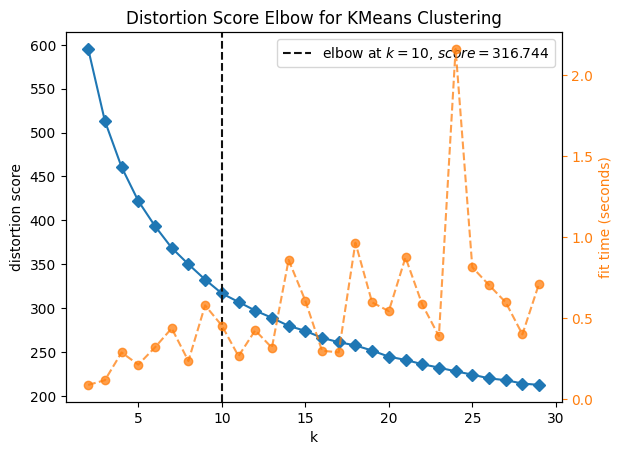

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Apply the elbow method
kmeans_elbow_method = KMeans(init='k-means++', n_init=10)
kmeans_elbow_visualizer = KElbowVisualizer(kmeans_elbow_method, k=(2, 30))

kmeans_elbow_visualizer.fit(Cluster_Data)
kmeans_elbow_visualizer.show()

### AIC(Akaike Information Criterion & BIC(Bayesian Information Criterion)

In [ ]:
# Create empty dictionary for AIC and BIC values
aic_score = {}
bic_score = {}

# Loop through different number of clusters
for i in range(2,30):
  # Create Gaussian Mixture Model
  gmm_bic_aic = GaussianMixture(n_components=i, random_state=42, n_init=10, init_params="k-means++").fit(Cluster_Data)
  # Get AIC score for the model
  aic_score[i] = gmm_bic_aic.aic(Cluster_Data)
  # Get BIC score for the model
  bic_score[i] = gmm_bic_aic.bic(Cluster_Data)

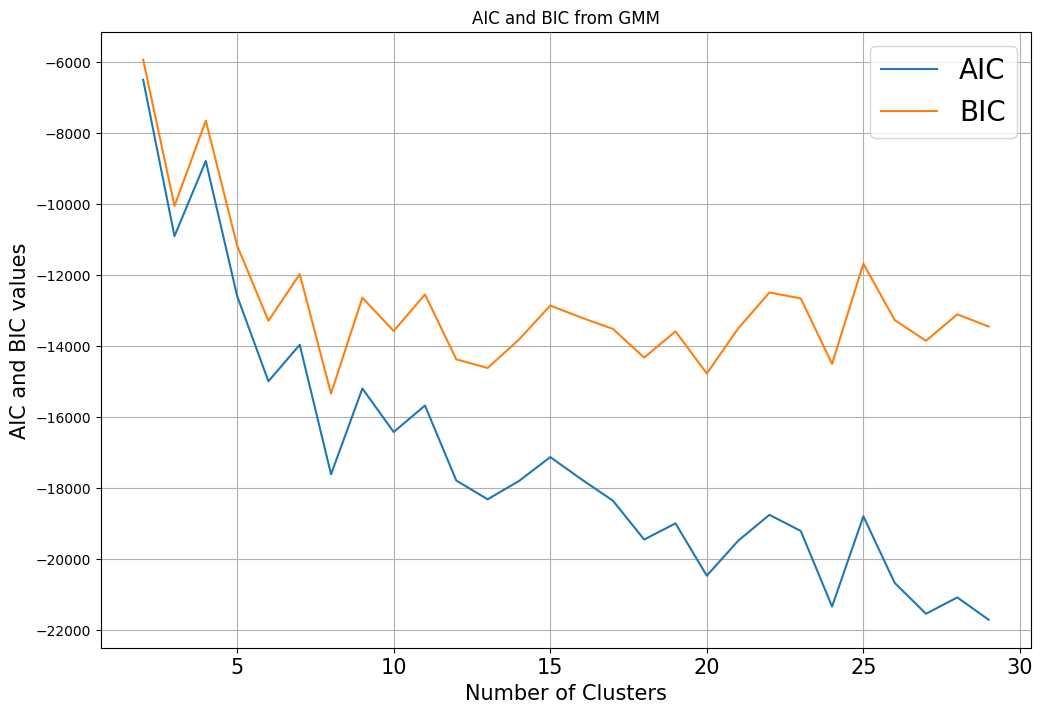

In [ ]:
# Visualization
plt.figure(figsize=(12,8))
plt.plot(list(aic_score.keys()),list(aic_score.values()), label='AIC')
plt.plot(list(bic_score.keys()),list(bic_score.values()), label='BIC')

plt.legend(loc='best', fontsize = 20)
plt.xticks(fontsize = 15)
plt.title('AIC and BIC from GMM')
plt.xlabel('Number of Clusters', fontsize=15)
plt.ylabel('AIC and BIC values', fontsize=15)
plt.grid(True)
plt.show()

### Silhouette Score

In [ ]:
# Determining number of clusters using silhouette score method
for k in range(2, 30):
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(Cluster_Data)
    pred = model.predict(Cluster_Data)
    score = silhouette_score(Cluster_Data, pred)
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

Silhouette Score for k = 2: 0.469
Silhouette Score for k = 3: 0.282
Silhouette Score for k = 4: 0.274
Silhouette Score for k = 5: 0.250
Silhouette Score for k = 6: 0.195
Silhouette Score for k = 7: 0.176
Silhouette Score for k = 8: 0.169
Silhouette Score for k = 9: 0.169
Silhouette Score for k = 10: 0.166
Silhouette Score for k = 11: 0.175
Silhouette Score for k = 12: 0.167
Silhouette Score for k = 13: 0.166
Silhouette Score for k = 14: 0.169
Silhouette Score for k = 15: 0.158
Silhouette Score for k = 16: 0.166
Silhouette Score for k = 17: 0.153
Silhouette Score for k = 18: 0.160
Silhouette Score for k = 19: 0.159
Silhouette Score for k = 20: 0.155
Silhouette Score for k = 21: 0.157
Silhouette Score for k = 22: 0.145
Silhouette Score for k = 23: 0.153
Silhouette Score for k = 24: 0.153
Silhouette Score for k = 25: 0.150
Silhouette Score for k = 26: 0.152
Silhouette Score for k = 27: 0.156
Silhouette Score for k = 28: 0.153
Silhouette Score for k = 29: 0.155


## Data Preparation for 2D and 3D Visualization

In [44]:
Cluster_Data_2D = Reduce_Dimensionality_2D(Cluster_Data)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [ ]:
Cluster_Data_3D = Reduce_Dimensionality_3D(Cluster_Data)

## K-MEANS
Analyze the K-Means clustering algorithm and visualize the results in 2D and 3D.

### KMEANS Visualization and Cluster Analysis for the lloyd algorithm.

lloyd is a EM-style algorithm.

In [ ]:
# Apply K-Means for the 9 indicators
kmeans_lloyd = KMeans(n_clusters=number_of_clusters, init='k-means++', n_init=10)
kmeans_lloyd_labels = kmeans_lloyd.fit_predict(Cluster_Data)
kmeans_lloyd_cluster_means = kmeans_lloyd.cluster_centers_

In [ ]:
Plot_Clusters_Size(kmeans_lloyd_labels, number_of_clusters)

In [ ]:
# Create the clusters based on the labels and create a new dataframe to store the institution name and cluster id.
kmeans_lloyd_clusters, kmeans_lloyd_cluster_dataframe = Create_Clusters(kmeans_lloyd_labels, number_of_clusters, QS_2023_DataFrame_CSV_CA)

In [ ]:
# Order the clusters based on the mean value of each institution in the cluster
ordered_lloyd_clusters = Order_Clusters(kmeans_lloyd_clusters)

### KMEANS Visualization and Cluster Analysis for the elkan algorithm.

The "elkan" variation can be more efficient on some datasets with well-defined clusters, by using the triangle inequality. However it’s more memory intensive due to the allocation of an extra array of shape (n_samples, n_clusters).

In [46]:
# Apply K-Means for the 9 indicators
kmeans_elkan = KMeans(n_clusters=number_of_clusters, init='k-means++', n_init=10, algorithm="elkan")
kmeans_elkan_labels = kmeans_elkan.fit_predict(Cluster_Data)
kmeans_elkan_cluster_means = kmeans_elkan.cluster_centers_

In [ ]:
Plot_Clusters_Size(kmeans_elkan_labels, number_of_clusters)

In [50]:
# Create the clusters based on the labels, and create a new dataframe to store the institution name and cluster id.
kmeans_elkan_clusters, kmeans_elkan_cluster_dataframe = Create_Clusters(kmeans_elkan_labels, number_of_clusters, QS_2023_DataFrame_CSV_CA)

In [51]:
# Order the clusters based on the mean value of each institution in the cluster
ordered_elkan_clusters = Order_Clusters(kmeans_elkan_clusters)

In [53]:
kmeans_elkan_2D_clusters = Create_2D_Clusters(kmeans_elkan_labels, number_of_clusters, Cluster_Data_2D)

In [54]:
kmeans_elkan_2D_ordered_clusters_array = Create_2D_Ordered_Cluster_Array(ordered_elkan_clusters, kmeans_elkan_2D_clusters)

In [55]:
kmeans_elkan_clusters_2D_labels = Create_2D_Labels(ordered_elkan_clusters, kmeans_elkan_2D_clusters)

Ordered Cluster Sizes: 

3 111
4 93
0 183
5 122
6 157
1 371
2 271


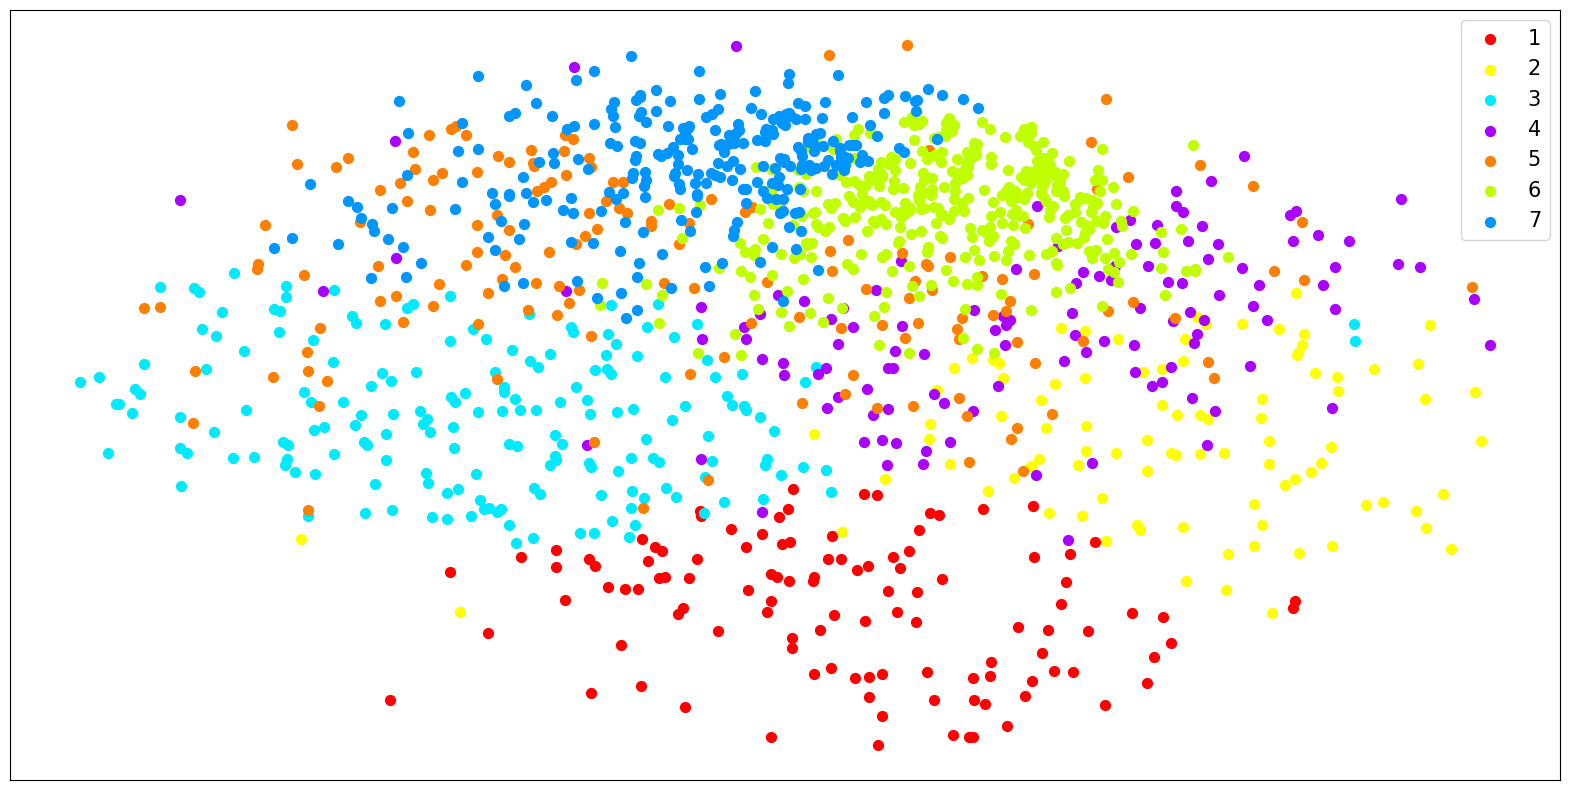

In [56]:
print(f'Ordered Cluster Sizes: \n')
for k in ordered_elkan_clusters.keys():
  print(f'{k} {len(kmeans_elkan_clusters[k])}')

Non_Interactive_Cluster_2D_Viz(kmeans_elkan_2D_ordered_clusters_array, kmeans_elkan_clusters_2D_labels, ordered_elkan_clusters, QS_2023_DataFrame_CSV_CA)

In [57]:
QS_clusters, QS_clusters_dataframe = Create_QS_Clusters(kmeans_elkan_clusters, ordered_elkan_clusters, QS_2023_DataFrame_CSV_CA, Cluster_Data_2D)

In [58]:
# Find the institutions that are expected to belong to a specific cluster but don't.
missing_institution_counts, missing_institution_clusters, missing_inst_df_2D = Get_Missing_Institutions(kmeans_elkan_clusters, QS_clusters, ordered_elkan_clusters, kmeans_elkan_cluster_dataframe, QS_clusters_dataframe, Cluster_Data_2D)

In [ ]:
missing_institution_counts

[4,
 18,
 21,
 30,
 19,
 22,
 32,
 38,
 31,
 33,
 28,
 45,
 31,
 64,
 66,
 51,
 47,
 37,
 119,
 72,
 69,
 38,
 67,
 63]

In [ ]:
missing_institution_clusters

[{6: 9},
 {0: 9, 5: 12, 3: 32},
 {6: 38, 5: 57, 4: 3},
 {6: 6, 3: 49, 2: 22, 4: 19, 1: 11},
 {3: 17, 4: 86, 1: 74, 5: 37},
 {4: 63, 2: 80, 5: 1},
 {2: 112, 1: 59}]

In [ ]:
# Check if there is any missing institution from the "missing_inst_df_2D" dataframe
# "missing_inst_df_2D" has every institution in the dataset in ascending order based on the rank
for i in range(0, 1308):
  if not (i == missing_inst_df_2D.iloc[i][1]):
    print(f'Missing institution/rank: {missing_inst_df_2D.iloc[i][0]}/{missing_inst_df_2D.iloc[i][1]}')

In [ ]:
# Create a new order of the clusters
ordered_clusters_dict = {}
cluster_index = 1
for k in ordered_elkan_clusters.keys():
  ordered_clusters_dict[k] = cluster_index
  cluster_index += 1

In [ ]:
new_missing_institution_clusters = []
for dictionary in missing_institution_clusters:
  new_missing_institution_clusters.append({})
  for key,value in dictionary.items():
    new_missing_institution_clusters[-1][ordered_clusters_dict[key]] = value

new_missing_institution_clusters

[{2: 4},
 {1: 4, 5: 4, 3: 9, 4: 1},
 {2: 8, 5: 5, 4: 8},
 {3: 10, 5: 8, 2: 4, 7: 5, 6: 2, 8: 1},
 {3: 1, 6: 3, 4: 9, 7: 2, 2: 2, 8: 1, 11: 1},
 {4: 7, 7: 8, 18: 1, 8: 4, 3: 1, 5: 1},
 {8: 5, 13: 2, 6: 10, 10: 5, 5: 1, 4: 5, 12: 1, 18: 2, 11: 1},
 {7: 13, 6: 3, 18: 1, 11: 8, 10: 6, 13: 6, 12: 1},
 {8: 7, 7: 4, 6: 2, 12: 3, 10: 8, 11: 3, 18: 1, 13: 3},
 {11: 4, 9: 6, 8: 7, 12: 6, 18: 4, 22: 4, 6: 1, 13: 1},
 {10: 4, 18: 5, 12: 7, 15: 2, 6: 1, 13: 1, 8: 6, 16: 1, 9: 1},
 {10: 6, 13: 7, 8: 5, 15: 4, 9: 8, 11: 5, 18: 3, 16: 5, 22: 1, 20: 1},
 {11: 1, 8: 1, 16: 7, 12: 6, 15: 2, 18: 3, 9: 5, 22: 2, 17: 2, 14: 2},
 {16: 12,
  12: 8,
  10: 3,
  18: 7,
  9: 7,
  20: 4,
  13: 3,
  17: 4,
  15: 7,
  22: 4,
  11: 4,
  8: 1},
 {10: 1, 12: 9, 17: 9, 13: 6, 16: 9, 20: 2, 18: 5, 14: 14, 22: 8, 11: 1, 9: 2},
 {12: 2,
  21: 4,
  18: 4,
  14: 11,
  20: 8,
  15: 8,
  17: 7,
  22: 3,
  23: 1,
  24: 2,
  13: 1},
 {13: 1,
  9: 1,
  22: 3,
  15: 13,
  23: 2,
  24: 2,
  19: 1,
  14: 5,
  21: 1,
  16: 8,
  20: 9

In [ ]:
# Change the values of "actual cluster" and "expected cluster" columns to be ordered from 1-7
missing_inst_df_2D = missing_inst_df_2D.to_numpy()
for i in range(missing_inst_df_2D.shape[0]):
  missing_inst_df_2D[i][2] = ordered_clusters_dict[missing_inst_df_2D[i][2]]
  missing_inst_df_2D[i][3] = ordered_clusters_dict[missing_inst_df_2D[i][3]]

In [ ]:
pd.DataFrame(data=missing_inst_df_2D, columns=['University', 'Rank', 'Expected Cluster', 'Actual Cluster', 'X', 'Y']).to_csv("kemans k24 weights mixed.csv", index=False)

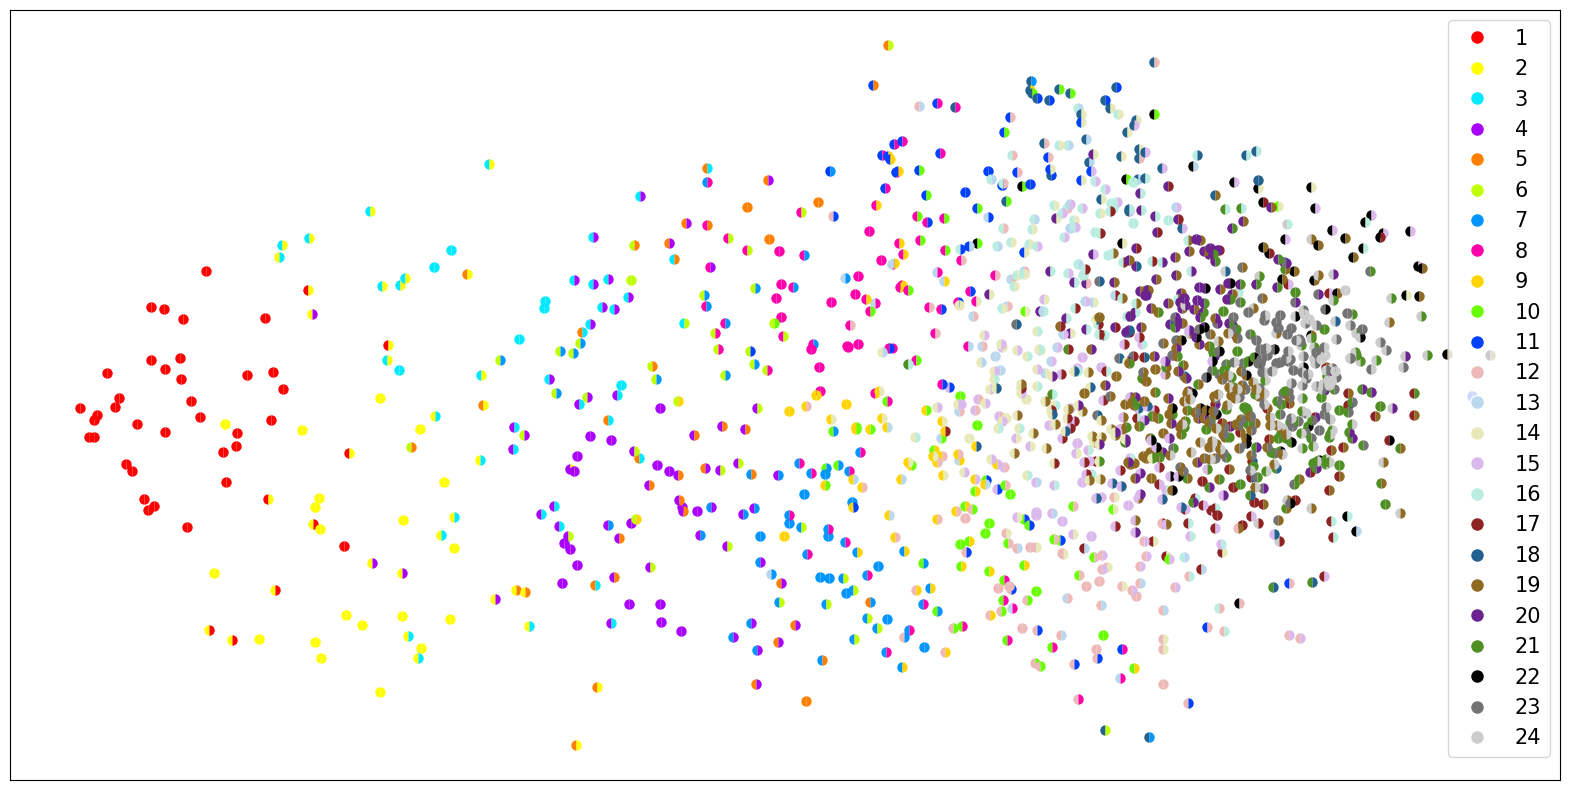

In [ ]:
Non_Interactive_Overlapping_Cluster_2D_Viz_(missing_inst_df_2D, number_of_clusters)

## GMM
Analyze the GMM clustering algorithm and visualize the results in 2D and 3D.

In [ ]:
# Apply GMM for the 9 indicators
gmm = GaussianMixture(n_components=number_of_clusters, n_init=10, init_params="k-means++")
gmm_labels = gmm.fit_predict(Cluster_Data)

In [ ]:
Plot_Clusters_Size(gmm_labels, number_of_clusters)

In [ ]:
# Create the clusters based on the labels and create a new dataframe to store the institution name and cluster id.
gmm_clusters, cluster_gmm_dataframe = Create_Clusters(gmm_labels, number_of_clusters, QS_2023_DataFrame_CSV_CA)

In [ ]:
# Order the clusters based on the mean value of each institution in the cluster
ordered_gmm_clusters = Order_Clusters(gmm_clusters)

In [ ]:
gmm_2D_clusters = Create_2D_Clusters(gmm_labels, number_of_clusters, Cluster_Data_2D)

In [ ]:
gmm_2D_ordered_cluster_array = Create_2D_Ordered_Cluster_Array(ordered_gmm_clusters, gmm_2D_clusters)

In [ ]:
gmm_clusters_2D_labels = Create_2D_Labels(ordered_gmm_clusters, gmm_2D_clusters)

Ordered Cluster Sizes: 

10 17
4 8
8 8
15 10
13 140
21 34
3 136
17 19
5 18
20 43
0 31
1 16
18 101
7 25
12 39
9 70
23 147
19 27
22 114
11 35
16 60
6 40
2 143
14 27


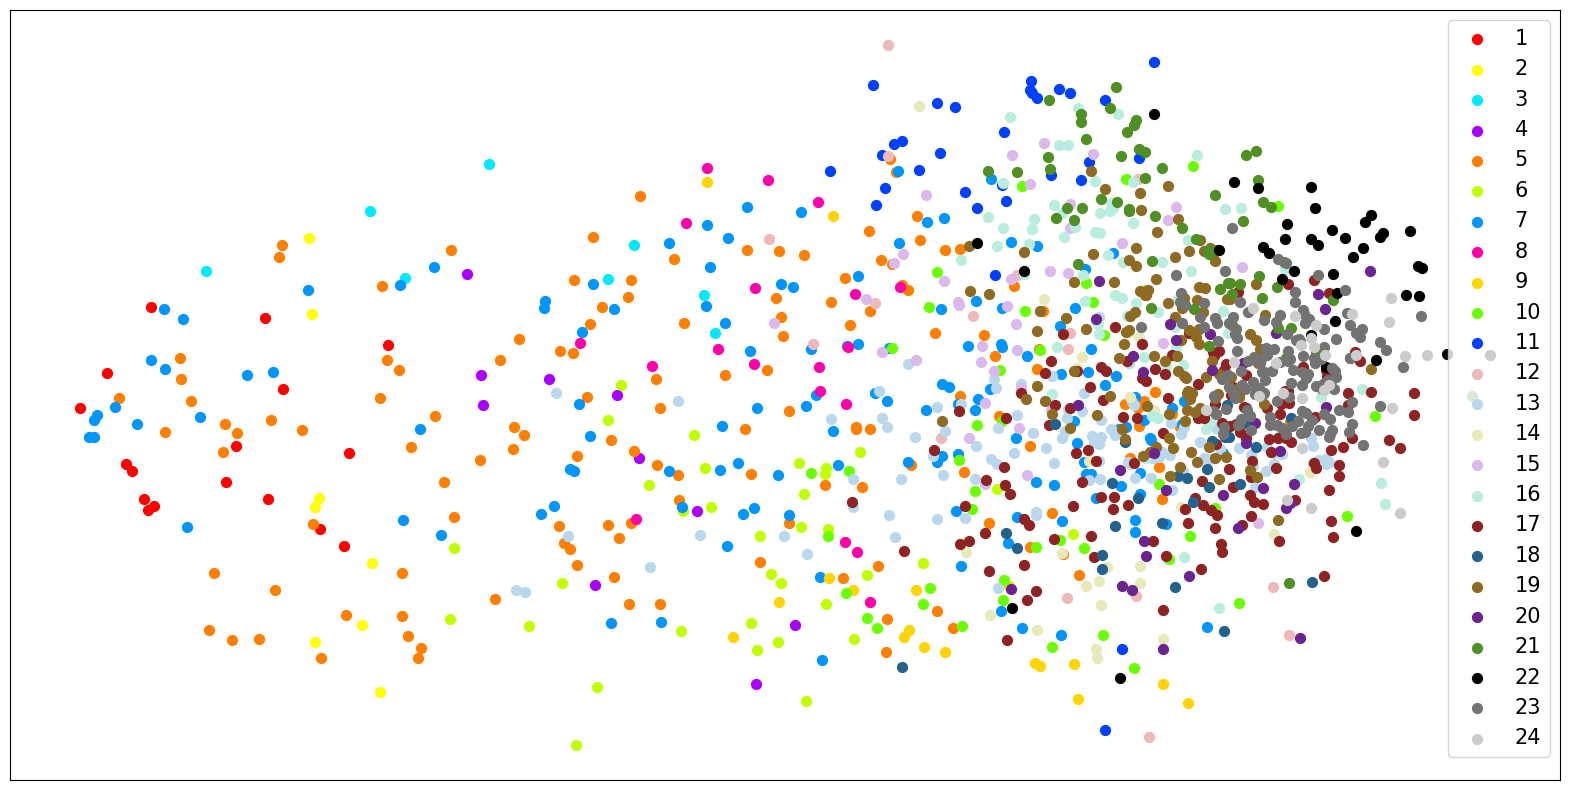

In [ ]:
print(f'Ordered Cluster Sizes: \n')
for k in ordered_gmm_clusters.keys():
  print(f'{k} {len(gmm_clusters[k])}')

Non_Interactive_Cluster_2D_Viz(gmm_2D_ordered_cluster_array, gmm_clusters_2D_labels, ordered_gmm_clusters, QS_2023_DataFrame_CSV_CA)

## Agglomerative Clustering
Analyze the Agglomerative clustering algorithm and visualize the results.

In [ ]:
# Agglomerative Clustering
agglomerative_clust = AgglomerativeClustering(n_clusters=number_of_clusters, distance_threshold=None)

# Fit and predict data
agglomerative_clust.fit_predict(Cluster_Data)

# Get labels
agglomerative_labels = agglomerative_clust.labels_

In [ ]:
Plot_Clusters_Size(agglomerative_labels, number_of_clusters)

In [ ]:
# Create the clusters based on the labels and create a new dataframe to store the institution name and cluster id.
ac_clusters, cluster_ac_dataframe = Create_Clusters(agglomerative_labels, number_of_clusters, QS_2023_DataFrame_CSV_CA)

In [ ]:
# Order the clusters based on the mean value of each institution in the cluster
ordered_ac_clusters = Order_Clusters(ac_clusters)

In [ ]:
ac_2D_clusters = Create_2D_Clusters(agglomerative_labels, number_of_clusters, Cluster_Data_2D)

In [ ]:
ac_2D_ordered_cluster_array = Create_2D_Ordered_Cluster_Array(ordered_ac_clusters, ac_2D_clusters)

In [ ]:
ac_clusters_2D_labels = Create_2D_Labels(ordered_ac_clusters, ac_2D_clusters)

Ordered Cluster Sizes: 

7 38
14 14
15 25
10 44
20 7
23 38
0 56
3 22
12 57
13 35
21 42
1 60
5 82
11 39
18 58
2 131
16 39
19 64
17 48
9 56
8 60
4 138
22 68
6 87


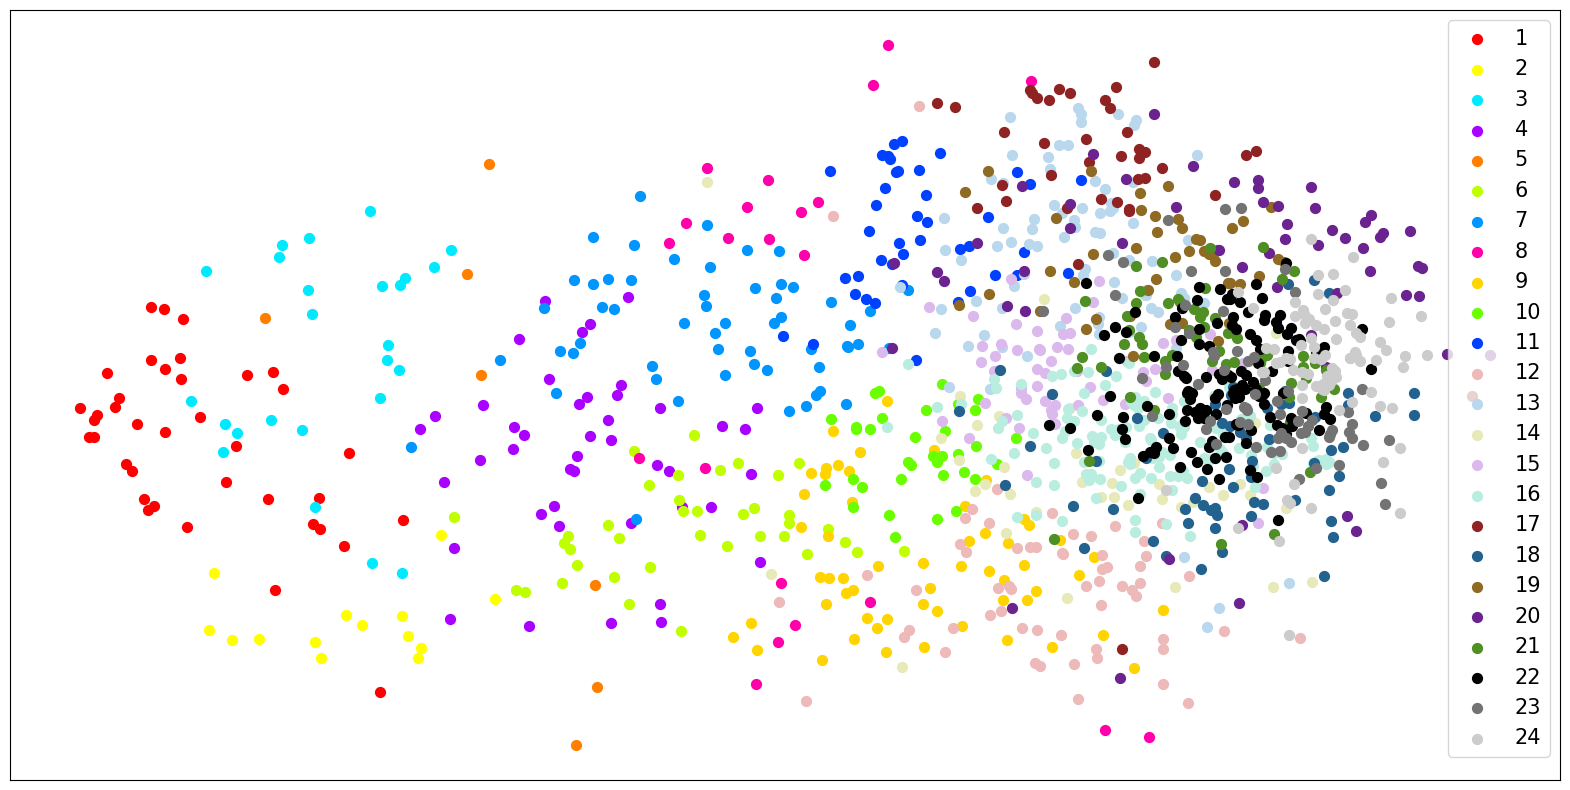

In [ ]:
print(f'Ordered Cluster Sizes: \n')
for k in ordered_ac_clusters.keys():
  print(f'{k} {len(ac_2D_clusters[k])}')

Non_Interactive_Cluster_2D_Viz(ac_2D_ordered_cluster_array, ac_clusters_2D_labels, ordered_ac_clusters, QS_2023_DataFrame_CSV_CA)

In [ ]:
QS_clusters, QS_clusters_dataframe = Create_QS_Clusters(ac_clusters, ordered_ac_clusters, QS_2023_DataFrame_CSV_CA, Cluster_Data_2D)

In [ ]:
# Find the institutions that are expected to belong to a specific cluster but don't.
missing_institution_counts, missing_institution_clusters, missing_inst_df_2D = Get_Missing_Institutions(ac_clusters, QS_clusters, ordered_ac_clusters, cluster_ac_dataframe, QS_clusters_dataframe, Cluster_Data_2D)

In [ ]:
missing_institution_counts

[8,
 12,
 33,
 22,
 40,
 49,
 33,
 26,
 26,
 21,
 41,
 37,
 31,
 30,
 43,
 54,
 84,
 75,
 37,
 31,
 106,
 97,
 100,
 65]

In [ ]:
missing_institution_clusters

In [ ]:
# Create a new order of the clusters
ordered_clusters_dict = {}
cluster_index = 1
for k in ordered_ac_clusters.keys():
  ordered_clusters_dict[k] = cluster_index
  cluster_index += 1

In [ ]:
ordered_clusters_dict

{9: 1,
 18: 2,
 5: 3,
 20: 4,
 0: 5,
 4: 6,
 7: 7,
 16: 8,
 22: 9,
 11: 10,
 23: 11,
 21: 12,
 17: 13,
 8: 14,
 12: 15,
 2: 16,
 6: 17,
 14: 18,
 13: 19,
 19: 20,
 10: 21,
 15: 22,
 1: 23,
 3: 24}

In [ ]:
new_missing_institution_clusters = []
for dictionary in missing_institution_clusters:
  new_missing_institution_clusters.append({})
  for key,value in dictionary.items():
    new_missing_institution_clusters[-1][ordered_clusters_dict[key]] = value

new_missing_institution_clusters

In [ ]:
# Change the values of "actual cluster" and "expected cluster" columns to be ordered from 1-7
missing_inst_df_2D = missing_inst_df_2D.to_numpy()
for i in range(missing_inst_df_2D.shape[0]):
  missing_inst_df_2D[i][2] = ordered_clusters_dict[missing_inst_df_2D[i][2]]
  missing_inst_df_2D[i][3] = ordered_clusters_dict[missing_inst_df_2D[i][3]]

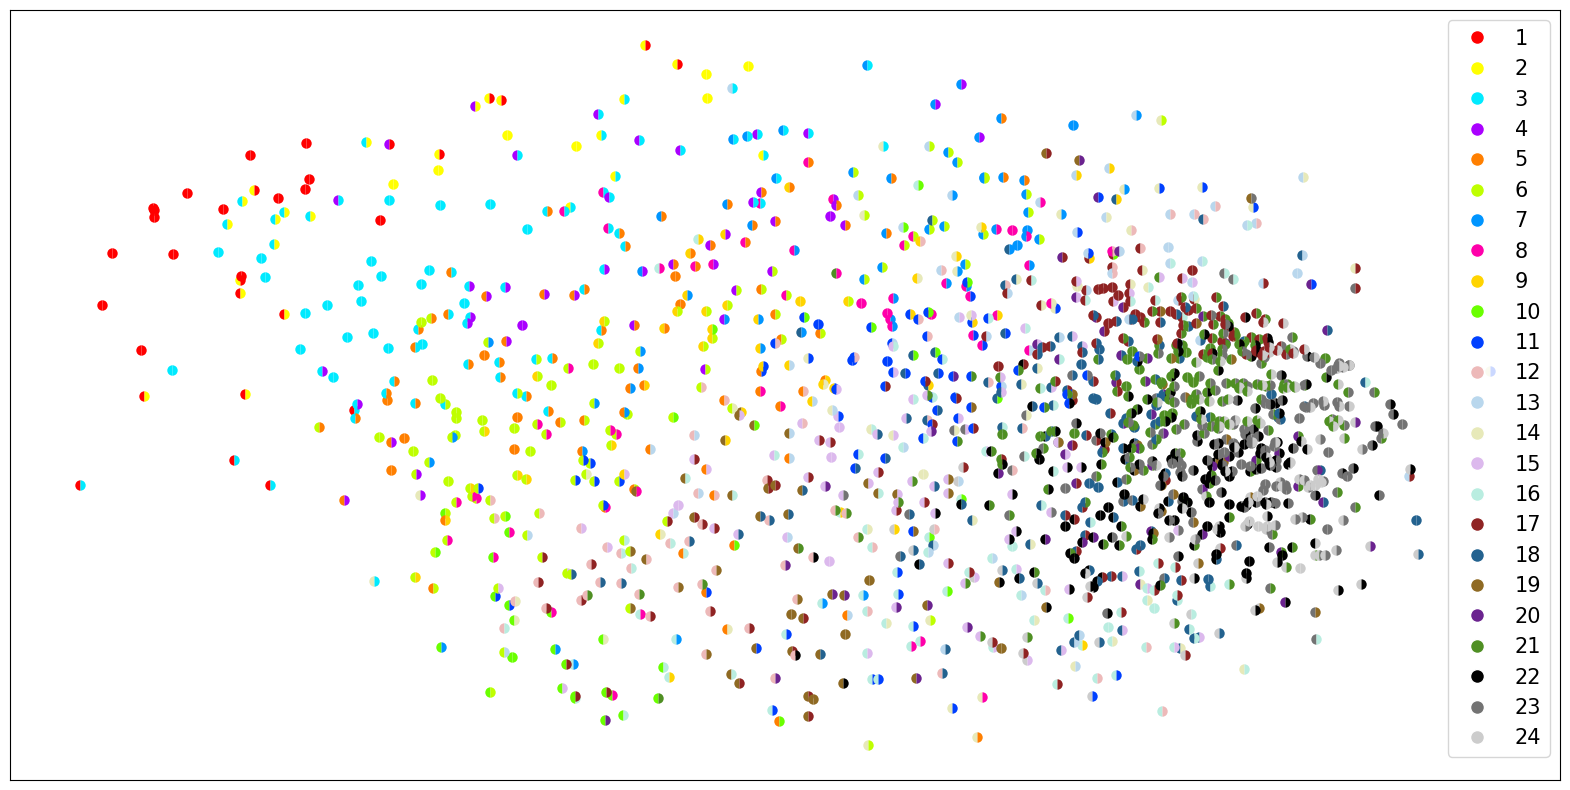

In [ ]:
Non_Interactive_Overlapping_Cluster_2D_Viz_(missing_inst_df_2D, number_of_clusters)

## Fuzzy CMeans
Analyze the K-Means clustering algorithm and visualize the results in 2D and 3D.

In [ ]:
# Apply CMeans for the 9 indicators
cmeans_fdata_grid = skfda.FDataGrid(Cluster_Data)
cmeans = skfda.ml.clustering.FuzzyCMeans(n_clusters=number_of_clusters, n_init=10)
cmeans_labels = cmeans.fit_predict(cmeans_fdata_grid)

cmeans_cluster_means = cmeans.cluster_centers_

# Get a percentage value for each institution for each cluster. This percentage value indicates the probability
# that an institution belongs to a cluster
cmeans_cluster_membership = cmeans.membership_degree_

In [ ]:
Plot_Clusters_Size(cmeans_labels, number_of_clusters)

In [ ]:
# Create the clusters based on the labels and create a new dataframe to store the institution name and cluster id.
cmeans_clusters, cluster_cmeans_dataframe = Create_Clusters(cmeans_labels, number_of_clusters, QS_2023_DataFrame_CSV_CA)

In [ ]:
# Order the clusters based on the mean value of each institution in the cluster
ordered_cmeans_clusters = Order_Clusters(cmeans_clusters)

In [ ]:
cmeans_2D_clusters = Create_2D_Clusters(cmeans_labels, number_of_clusters, Cluster_Data_2D)

In [ ]:
cmeans_2D_ordered_cluster_array = Create_2D_Ordered_Cluster_Array(ordered_cmeans_clusters, cmeans_2D_clusters)

In [ ]:
cmeans_clusters_2D_labels = Create_2D_Labels(ordered_cmeans_clusters, cmeans_2D_clusters)

Ordered Cluster Sizes: 

21 28
9 27
7 24
22 39
6 43
19 27
15 38
11 82
16 121
10 98
12 92
17 1
20 76
23 15
3 12
0 23
8 262
4 1
2 2
18 297


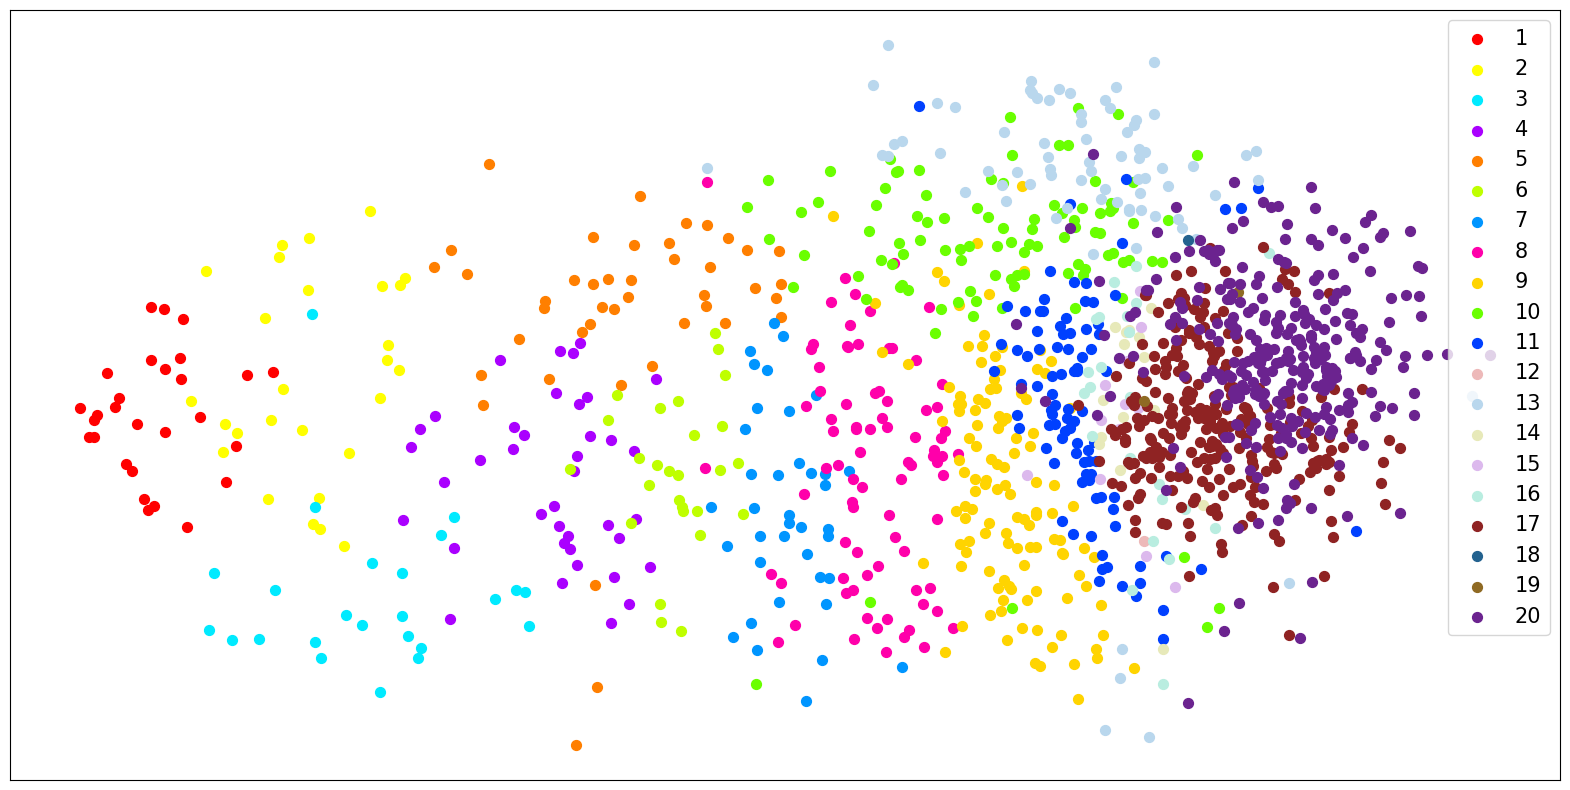

In [ ]:
print(f'Ordered Cluster Sizes: \n')
for k in ordered_cmeans_clusters.keys():
  print(f'{k} {len(cmeans_2D_clusters[k])}')

Non_Interactive_Cluster_2D_Viz(cmeans_2D_ordered_cluster_array, cmeans_clusters_2D_labels, ordered_cmeans_clusters, QS_2023_DataFrame_CSV_CA)

In [ ]:
QS_clusters, QS_clusters_dataframe = Create_QS_Clusters(cmeans_clusters, ordered_cmeans_clusters, QS_2023_DataFrame_CSV_CA, Cluster_Data_2D)

In [ ]:
# Find the institutions that are expected to belong to a specific cluster but don't.
missing_institution_counts, missing_institution_clusters, missing_inst_df_2D = Get_Missing_Institutions(cmeans_clusters, QS_clusters, ordered_cmeans_clusters, cluster_cmeans_dataframe, QS_clusters_dataframe, Cluster_Data_2D)

In [ ]:
missing_institution_counts

[15, 130, 133, 114, 56, 77, 127]

In [ ]:
missing_institution_clusters

[{5: 11, 0: 4},
 {6: 15, 5: 87, 3: 25, 4: 3},
 {4: 20, 2: 9, 0: 55, 3: 45, 1: 4},
 {1: 3, 4: 30, 5: 31, 2: 12, 0: 38},
 {5: 3, 4: 31, 0: 8, 3: 13, 1: 1},
 {4: 43, 0: 16, 3: 9, 2: 8, 5: 1},
 {3: 22, 2: 27, 1: 69, 0: 9}]

In [ ]:
# Check if there is any missing institution from the "missing_inst_df_2D" dataframe
# "missing_inst_df_2D" has every institution in the dataset in ascending order based on the rank
for i in range(0, 1308):
  if not (i == missing_inst_df_2D.iloc[i][1]):
    print(f'Missing institution/rank: {missing_inst_df_2D.iloc[i][0]}/{missing_inst_df_2D.iloc[i][1]}')

In [ ]:
# Create a new order of the clusters
ordered_clusters_dict = {}
cluster_index = 1
for k in ordered_cmeans_clusters.keys():
  ordered_clusters_dict[k] = cluster_index
  cluster_index += 1

In [ ]:
# Change the values of "actual cluster" and "expected cluster" columns to be ordered from 1-7
missing_inst_df_2D = missing_inst_df_2D.to_numpy()
for i in range(missing_inst_df_2D.shape[0]):
  missing_inst_df_2D[i][2] = ordered_clusters_dict[missing_inst_df_2D[i][2]]
  missing_inst_df_2D[i][3] = ordered_clusters_dict[missing_inst_df_2D[i][3]]

In [ ]:
pd.DataFrame(data=missing_inst_df_2D[:, 0:4], columns=['University', 'Rank', 'QS Cluster', 'Fuzzy C-Means Cluster']).to_csv("fuzzy k7 no weights mixed.csv", index=False)

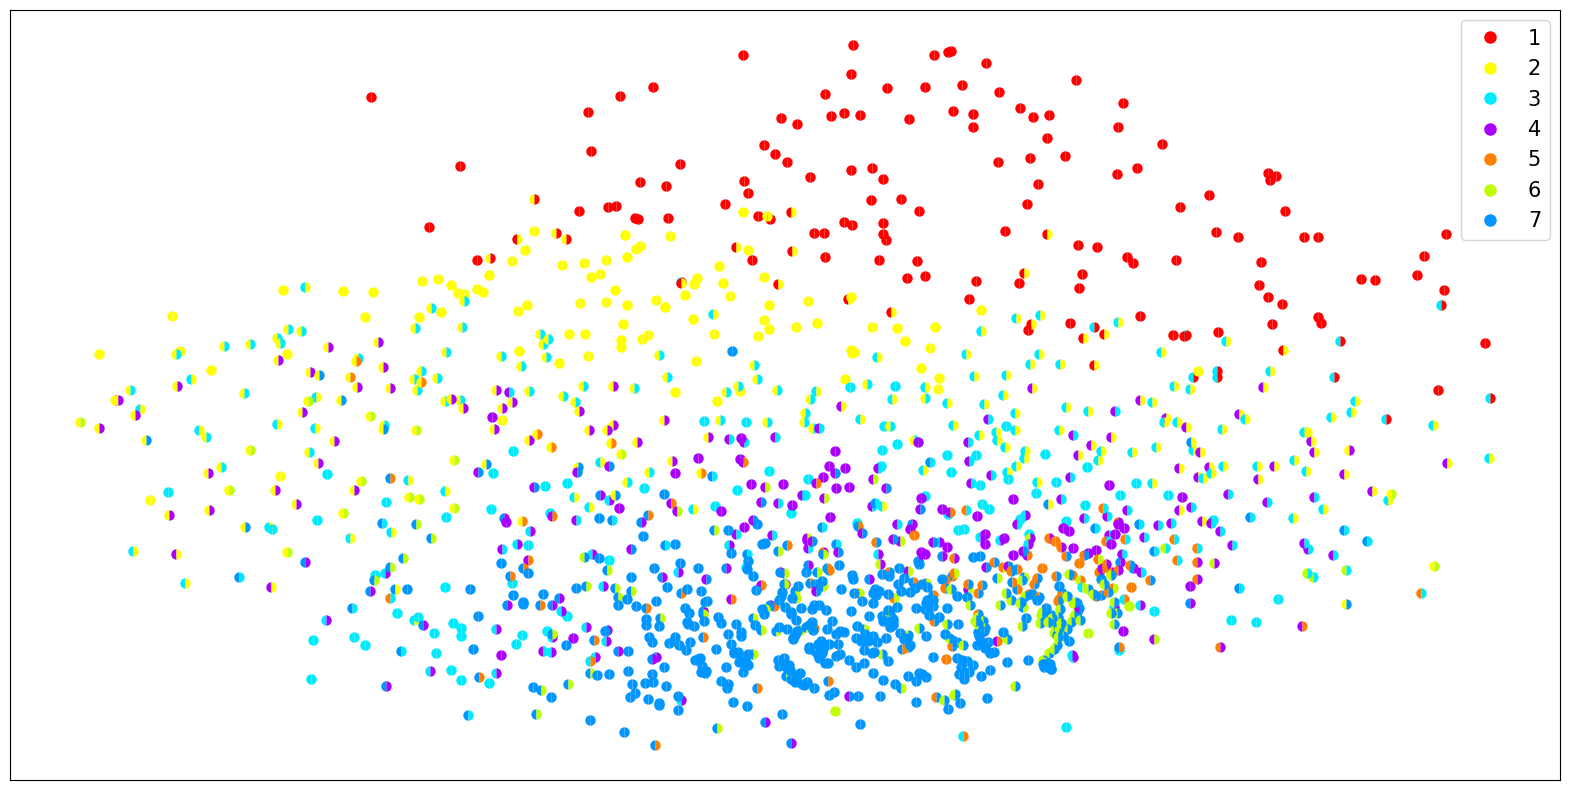

In [ ]:
Non_Interactive_Overlapping_Cluster_2D_Viz_(missing_inst_df_2D, number_of_clusters)

## Rand Score
Calculate Rand Score for the K-Means(lloyd, elkan) algorithm, GMM, the Agglomerative Clustering algorithm and the CMeans algorithm.

The **Rand index** is a way to compare the similarity of results between two different clustering methods.

Often denoted R, the Rand Index is calculated as:

***R = (a+b) / (nC2)***

where:

- **a:** The number of times a pair of elements belongs to the same cluster across two clustering methods.
- **b:** The number of times a pair of elements belong to different clusters across two clustering methods.
- **nC2:** The number of unordered pairs in a set of n elements.

The Rand index always takes on a value between 0 and 1 where:

- 0: Indicates that two clustering methods do not agree on the clustering of any pair of elements.
- 1: Indicates that two clustering methods perfectly agree on the clustering of every pair of elements.

We will calculate the Rand Score for the following algorithms:


1.   KMeans(lloyd)
2.   KMeans(elkan)
3.   GMM(Gaussian Mixture)
4.   Agglomerative Hierarchical Clustering
5.   Fuzzy CMeans



In [ ]:
Rand_Score = [
    # KMeans(lloyd)
    rand_score(kmeans_lloyd_labels, kmeans_elkan_labels),
    rand_score(kmeans_lloyd_labels, gmm_labels),
    rand_score(kmeans_lloyd_labels, agglomerative_labels),
    rand_score(kmeans_lloyd_labels, cmeans_labels),
    rand_score(kmeans_lloyd_labels, Create_QS_Labels(kmeans_lloyd_clusters, ordered_lloyd_clusters)),

    # KMeans(elkan)
    rand_score(kmeans_elkan_labels, gmm_labels),
    rand_score(kmeans_elkan_labels, agglomerative_labels),
    rand_score(kmeans_elkan_labels, cmeans_labels),
    rand_score(kmeans_elkan_labels, Create_QS_Labels(kmeans_elkan_clusters, ordered_elkan_clusters)),

    # GMM
    rand_score(gmm_labels, agglomerative_labels),
    rand_score(gmm_labels, cmeans_labels),
    rand_score(gmm_labels, Create_QS_Labels(gmm_clusters, ordered_gmm_clusters)),

    # Agglomerative Hierar. Clustering
    rand_score(agglomerative_labels, cmeans_labels),
    rand_score(agglomerative_labels, Create_QS_Labels(ac_clusters, ordered_ac_clusters)),

    # CMeans
    rand_score(cmeans_labels, Create_QS_Labels(cmeans_clusters, ordered_cmeans_clusters))
]

In [ ]:
# Rand Index for all algorithms
data = {
    "KMeans(lloyd)":    ["1.0", Rand_Score[0], Rand_Score[1], Rand_Score[2], Rand_Score[3], Rand_Score[4]],
    "KMeans(elkan)":    [Rand_Score[0], "1.0", Rand_Score[5], Rand_Score[6], Rand_Score[7], Rand_Score[8]],
    "GMM":              [Rand_Score[1], Rand_Score[5], "1.0", Rand_Score[9], Rand_Score[10], Rand_Score[11]],
    "Agglomerative":    [Rand_Score[2], Rand_Score[6], Rand_Score[9], "1.0", Rand_Score[12], Rand_Score[13]],
    "Fuzzy CMeans":     [Rand_Score[3], Rand_Score[7], Rand_Score[10], Rand_Score[12], "1.0", Rand_Score[14]],
    "QS":               [Rand_Score[4], Rand_Score[8], Rand_Score[11], Rand_Score[13], Rand_Score[14], "1.0"]
}

Rand_Score_DataFrame = pd.DataFrame(data, index=["KMeans(lloyd)",
                                                 "KMeans(elkan)",
                                                 "GMM",
                                                 "Agglomerative",
                                                 "Fuzzy CMeans",
                                                 "QS"
                                                 ])

In [ ]:
# Rand Index for kmeans(elkan), GMM and Agglomerative
data = {
    "KMeans(elkan)":    ["1.0", Rand_Score[5], Rand_Score[6], Rand_Score[8]],
    "GMM":              [Rand_Score[5], "1.0", Rand_Score[9], Rand_Score[11]],
    "Agglomerative":    [Rand_Score[6], Rand_Score[9], "1.0", Rand_Score[13]],
    "QS":               [Rand_Score[8], Rand_Score[11], Rand_Score[13], "1.0"]
}

Rand_Score_DataFrame = pd.DataFrame(data, index=[
                                                 "KMeans(elkan)",
                                                 "GMM",
                                                 "Agglomerative",
                                                 "QS"
                                                 ])

In [ ]:
# Rand Index for kmeans(elkan), GMM, Agglomerative and fuzzy CMeans
data = {
    "KMeans(elkan)":    ["1.0", Rand_Score[5], Rand_Score[6], Rand_Score[7], Rand_Score[8]],
    "GMM":              [Rand_Score[5], "1.0", Rand_Score[9], Rand_Score[10], Rand_Score[11]],
    "Agglomerative":    [Rand_Score[6], Rand_Score[9], "1.0", Rand_Score[12], Rand_Score[13]],
    "Fuzzy CMeans":     [Rand_Score[7], Rand_Score[10], Rand_Score[12], "1.0", Rand_Score[14]],
    "QS":               [Rand_Score[8], Rand_Score[11], Rand_Score[13], Rand_Score[14], "1.0"]
}

Rand_Score_DataFrame = pd.DataFrame(data, index=[
                                                 "KMeans(elkan)",
                                                 "GMM",
                                                 "Agglomerative",
                                                 "Fuzzy CMeans",
                                                 "QS"
                                                 ])

In [ ]:
Rand_Score_DataFrame

,KMeans(elkan),GMM,Agglomerative,Fuzzy CMeans,QS
KMeans(elkan),1.0,0.904505,0.938935,0.879995,0.916053
GMM,0.904505,1.0,0.907833,0.847311,0.882512
Agglomerative,0.938935,0.907833,1.0,0.873114,0.908657
Fuzzy CMeans,0.879995,0.847311,0.873114,1.0,0.845611
QS,0.916053,0.882512,0.908657,0.845611,1.0


In [ ]:
Rand_Score_DataFrame.to_csv("Rand_Index_For_9_indicators_Without_Weights_With_FuzzyCMeans.csv")

## Spearman Rank Correlation


Spearman's rank correlation coefficient is a measure of the strength and direction of the association between two variables. It is commonly used to evaluate the similarity between two ranked lists of items. In the context of evaluating clustering algorithms, we can use Spearman's rank correlation coefficient to compare the similarity between the clustering results and a set of ground truth labels. Here are the general steps to apply the Spearman rank correlation coefficient to evaluate clustering algorithms:

1. Obtain a set of ground truth labels for the data set. These labels should
represent the true underlying clusters in the data.

2. Apply the clustering algorithm to the data set and obtain the cluster assignments for each data point.

3. Compute the Spearman's rank correlation coefficient between the ground truth labels and the cluster assignments. To do this, rank the data points in each list (ground truth labels and cluster assignments) and compute the correlation between the ranks. A higher correlation indicates better agreement between the two lists.

4. Repeat steps 2 and 3 for different clustering algorithms or different parameter settings for the same algorithm, if desired.

Note that Spearman's rank correlation coefficient is just one way to evaluate clustering algorithms, and it may not be appropriate for all situations. Other metrics, such as purity or normalized mutual information, may be more appropriate depending on the specific problem and data set.

In [ ]:
Spearman_data = {
    "KMeans(lloyd)": kmeans_lloyd_labels,
    "KMeans(elkan)": kmeans_elkan_labels,
    "GMM": gmm_labels,
    "Agglomerative": agglomerative_labels,
    "Fuzzy CMeans": cmeans_labels,
    "QS": qs_cluster_labels
}

In [ ]:
pValue_Data = {}
correlation_Data = {}

In [ ]:
from scipy import stats

for main_algo, main_labels in Spearman_data.items():
  pValue_Data[main_algo] = []
  correlation_Data[main_algo] = []
  for sec_algo, sec_labels in Spearman_data.items():
    res = stats.spearmanr(main_labels, sec_labels)

    pValue_Data[main_algo].append(res.pvalue)
    correlation_Data[main_algo].append(res.statistic)

In [ ]:
Spearman_Correlation_DataFrame = pd.DataFrame(correlation_Data, index=["KMeans(lloyd)",
                                                 "KMeans(elkan)",
                                                 "GMM",
                                                 "Agglomerative",
                                                 "Fuzzy CMeans",
                                                 "QS"
                                                 ])

In [ ]:
Spearman_pValue_DataFrame = pd.DataFrame(pValue_Data, index=["KMeans(lloyd)",
                                                 "KMeans(elkan)",
                                                 "GMM",
                                                 "Agglomerative",
                                                 "Fuzzy CMeans",
                                                 "QS"
                                                 ])

In [ ]:
Spearman_Correlation_DataFrame

,KMeans(lloyd),KMeans(elkan),GMM,Agglomerative,Fuzzy CMeans,QS
KMeans(lloyd),1.000000,0.393541,0.023370,0.105730,-0.104539,-0.247327
KMeans(elkan),0.393541,1.000000,0.034228,0.113085,-0.253547,-0.169785
GMM,0.023370,0.034228,1.000000,0.223673,-0.123307,-0.033853
Agglomerative,0.105730,0.113085,0.223673,1.000000,-0.231481,-0.239420
Fuzzy CMeans,-0.104539,-0.253547,-0.123307,-0.231481,1.000000,-0.039600
QS,-0.247327,-0.169785,-0.033853,-0.239420,-0.039600,1.000000


In [ ]:
Spearman_pValue_DataFrame